In [21]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from final.data_process.format_missing_data import separate_categories_replace_nan_w_missing 
from final.data_process.format_missing_data import fill_na_with_missing
from final.data_process.visualization import visualization_str_column_attributes
from final.data_process.visualization import visualization_numeric_distribution
from final.data_process.visualization import display_correlation_matrix
from final.data_process.visualization import plot_sort_corr_coeff, plot_pair_plot
from final.data_process.text_cleaning import cleaning_text
from final.feature_extraction.extract_text_information import get_word_count, get_special_char_count
from final.data_process.normalization import normalize_numeric_col


from final.random_sampling.even_sample_brand import stratified_sampling_by_brand
from final.random_sampling.even_sample_category import stratified_sampling_by_category
from final.random_sampling.even_sample_by_price_range import stratified_sampling_by_price

from final.feature_extraction.text_vectorization import encode_categories,encode_string_column

matplotlib.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['figure.constrained_layout.use'] = True

In [2]:
# read data
df = pd.read_csv("data/train.tsv",sep="\t")
df.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [3]:
df.shape

(1482535, 8)

In [4]:
# check missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [5]:
# fill missing data
df = separate_categories_replace_nan_w_missing(df)
df = fill_na_with_missing(df)

In [6]:
# check after handling missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   brand_name         1482535 non-null  object 
 4   price              1482535 non-null  float64
 5   shipping           1482535 non-null  int64  
 6   item_description   1482535 non-null  object 
 7   c1                 1482535 non-null  object 
 8   c2                 1482535 non-null  object 
 9   c3                 1482535 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 113.1+ MB


In [7]:
# remove invalidate price -> price must greater than 0
original_num_item = len(df)
df = df[df.price > 0]
print("number of item with price less than or equal to 0: ", abs(len(df)-original_num_item))

number of item with price less than or equal to 0:  874


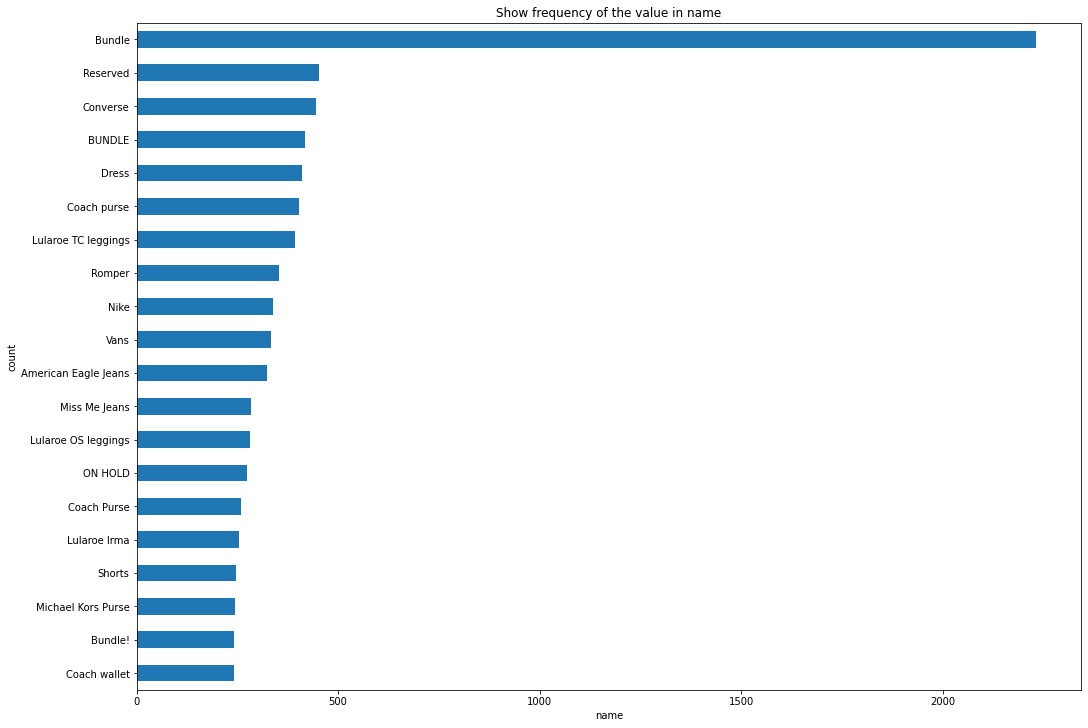

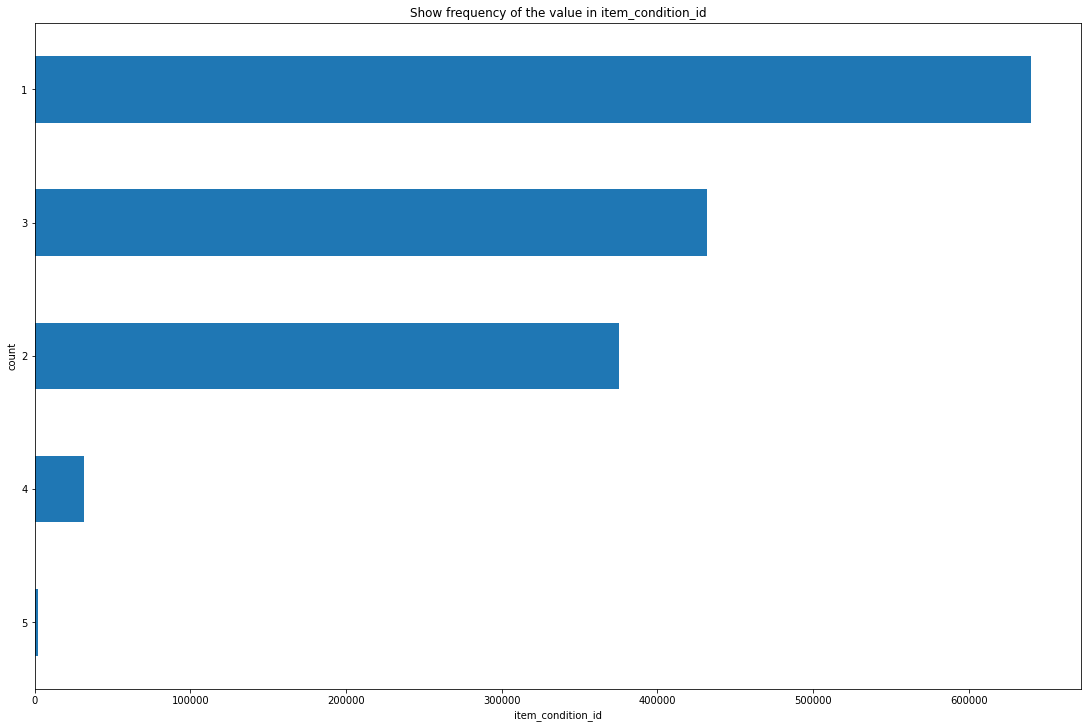

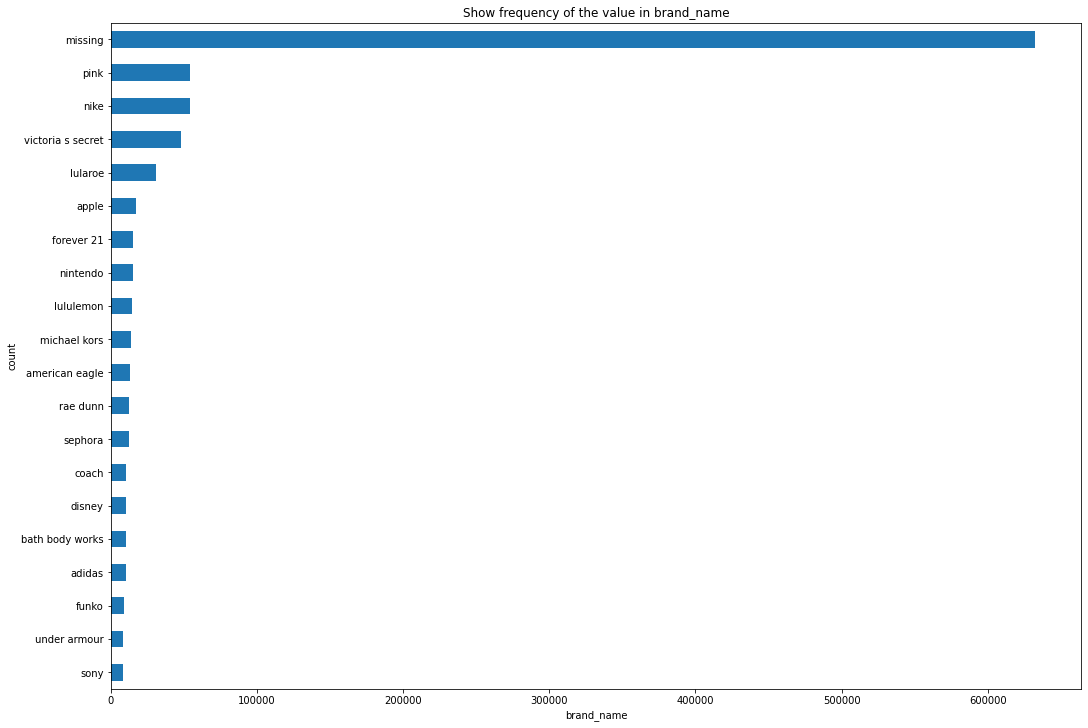

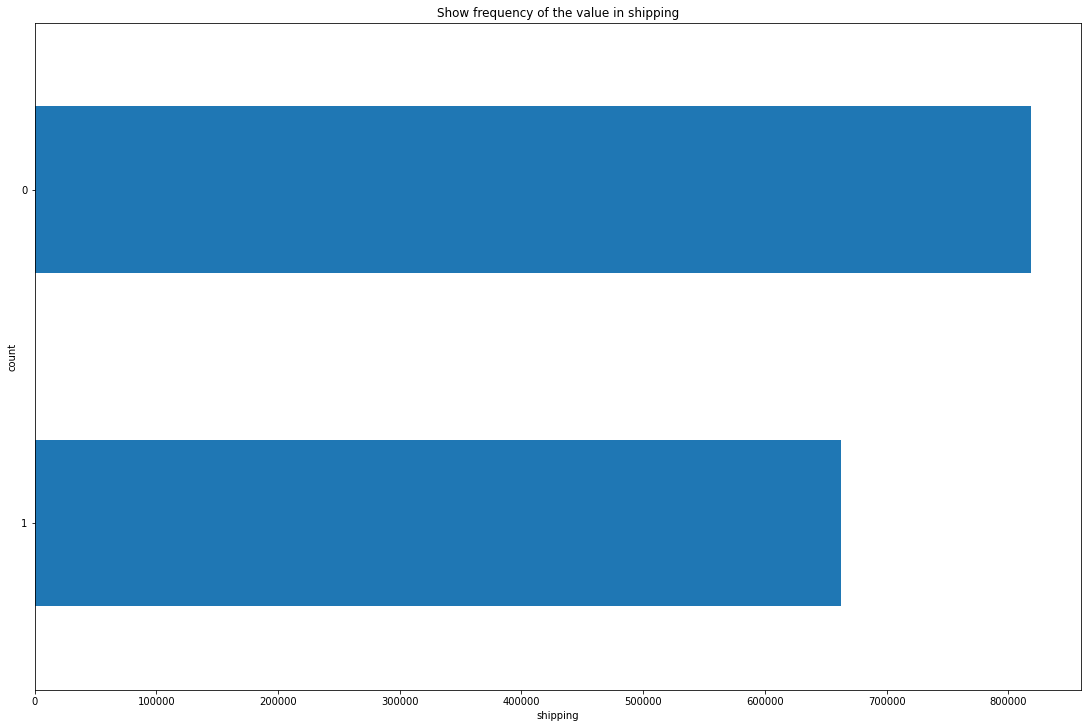

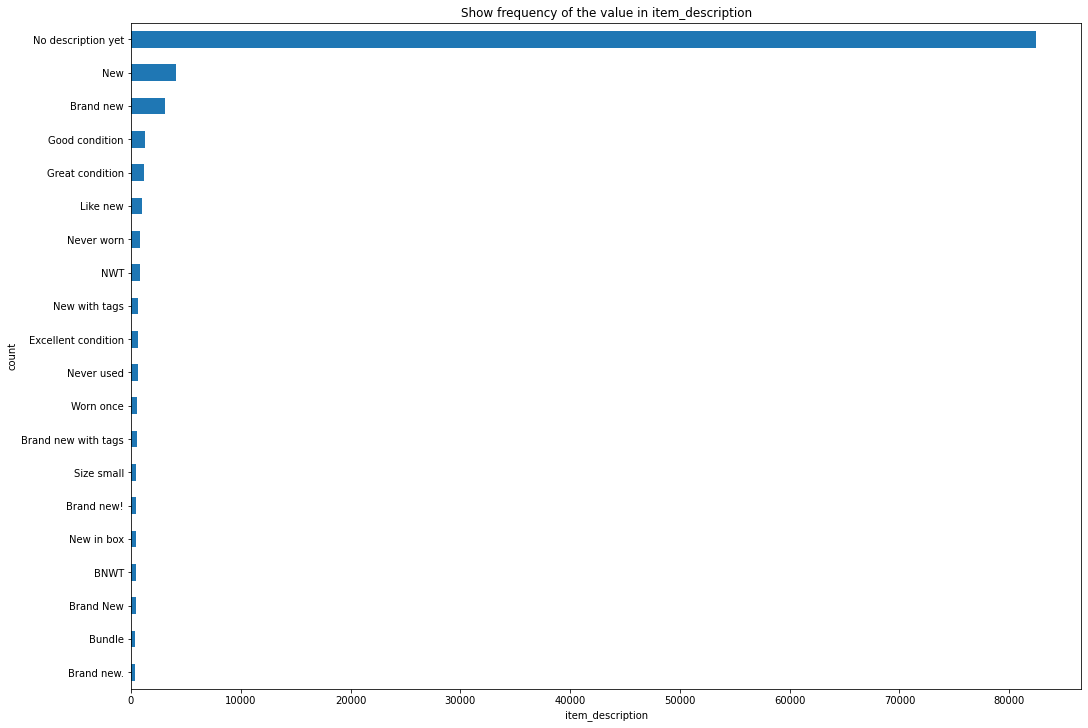

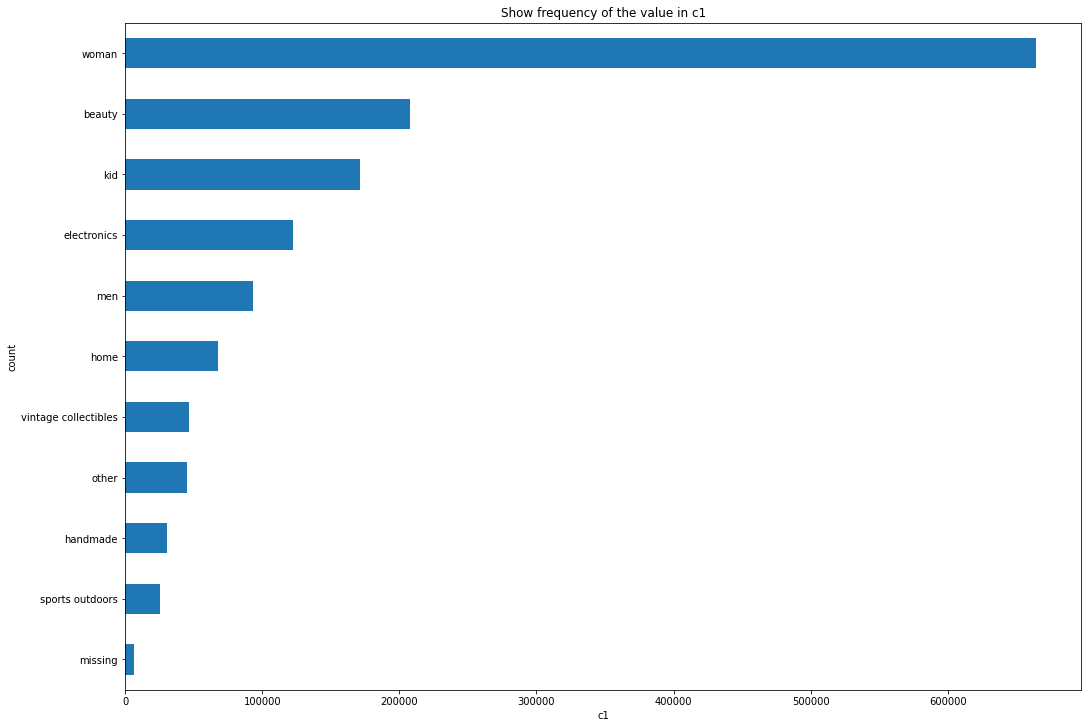

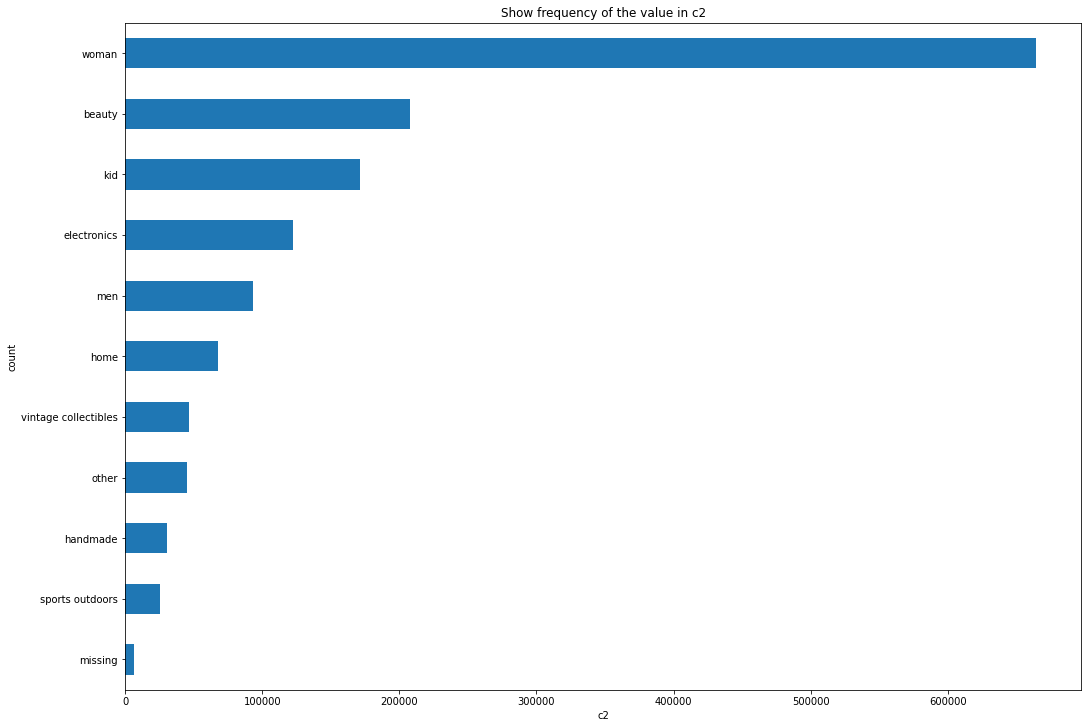

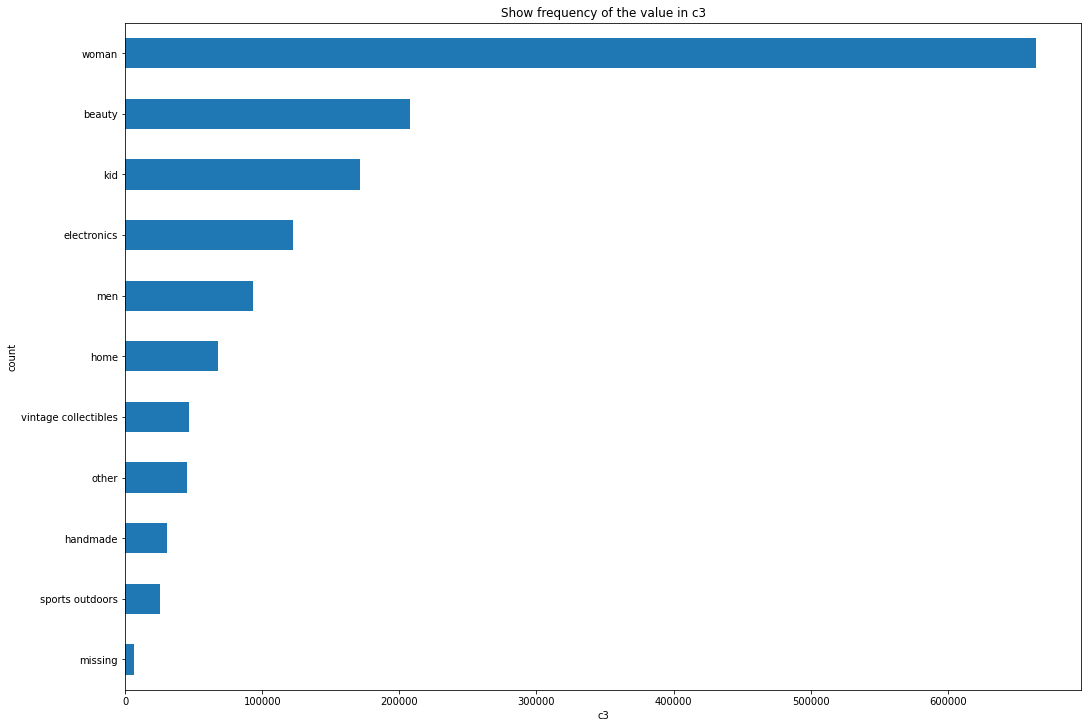

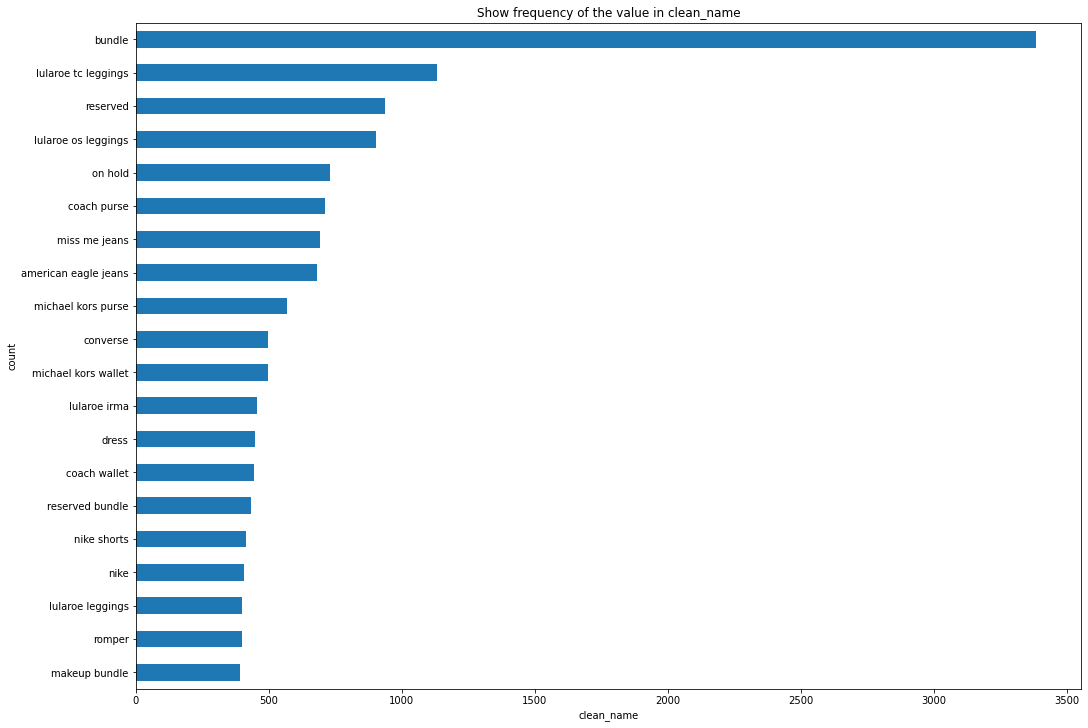

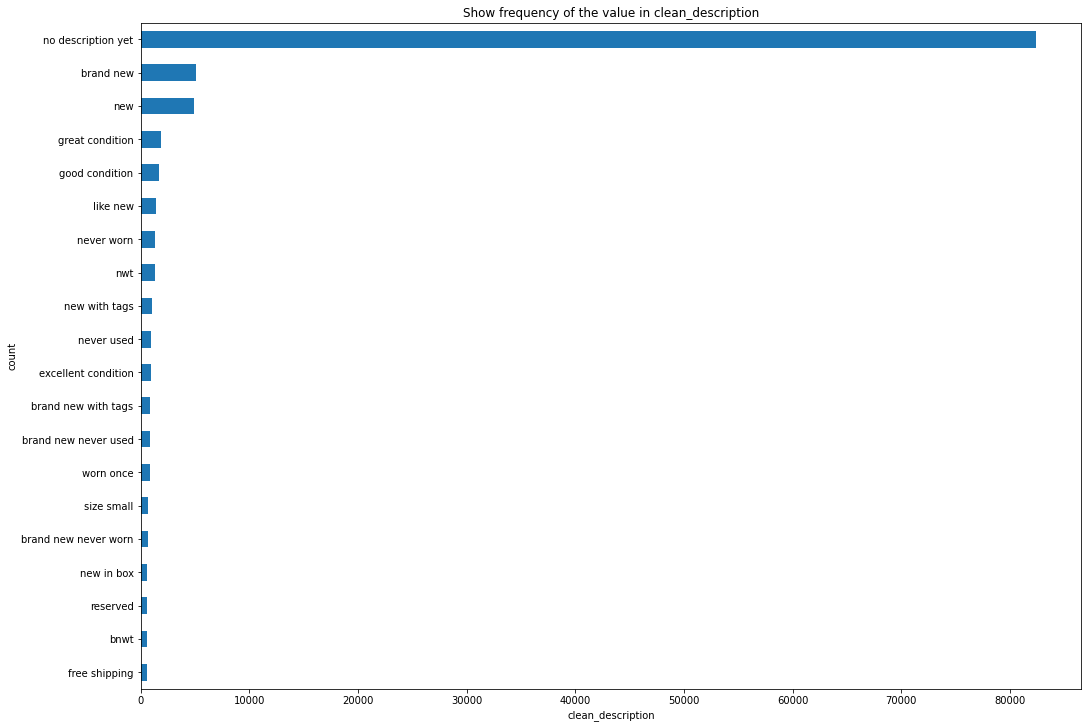

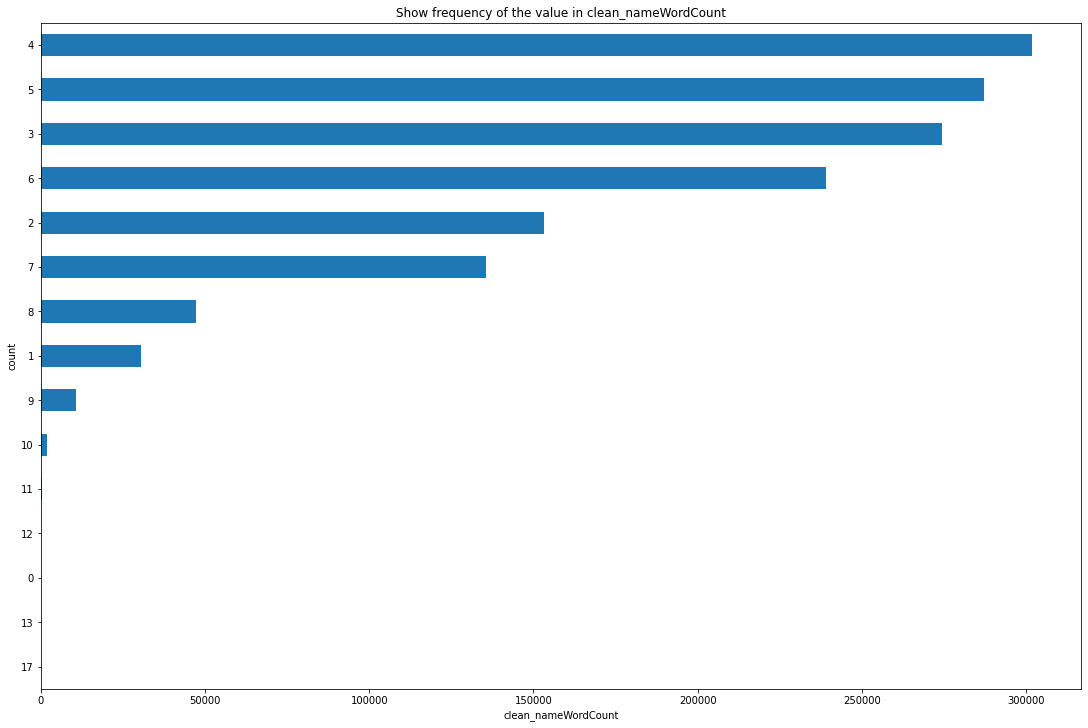

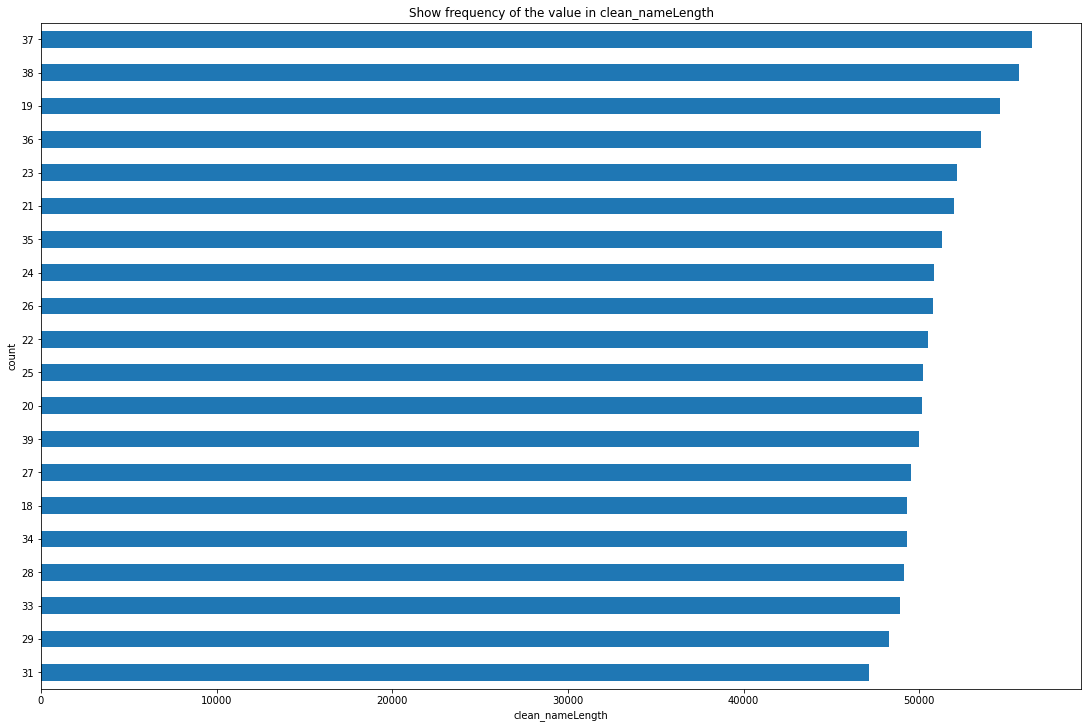

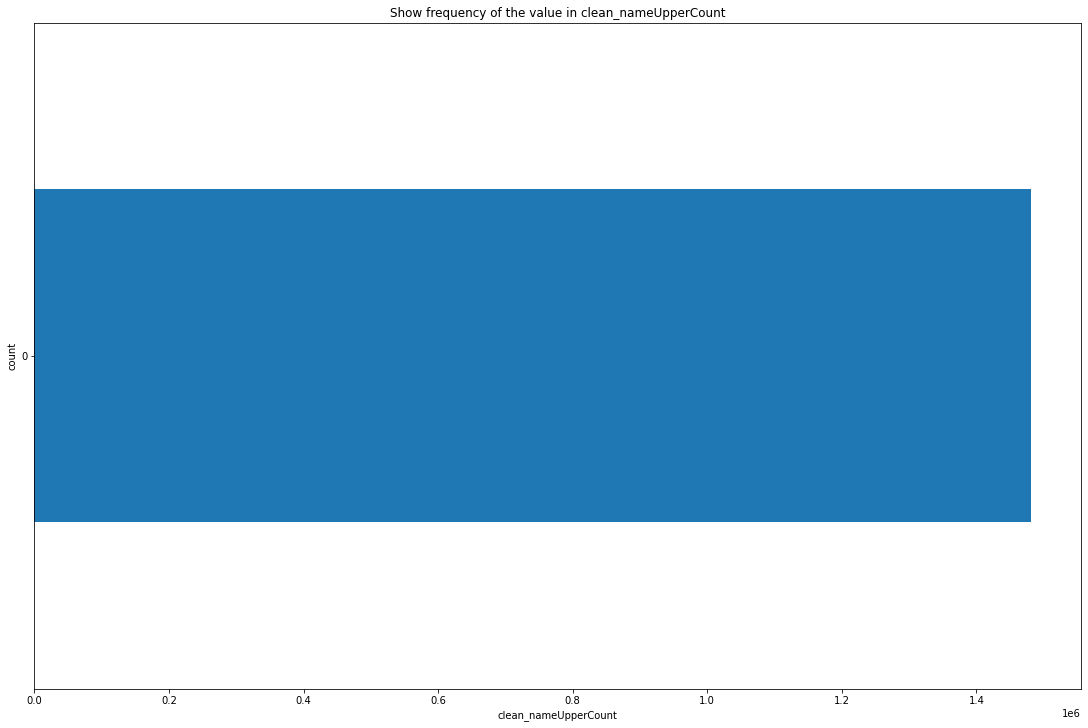

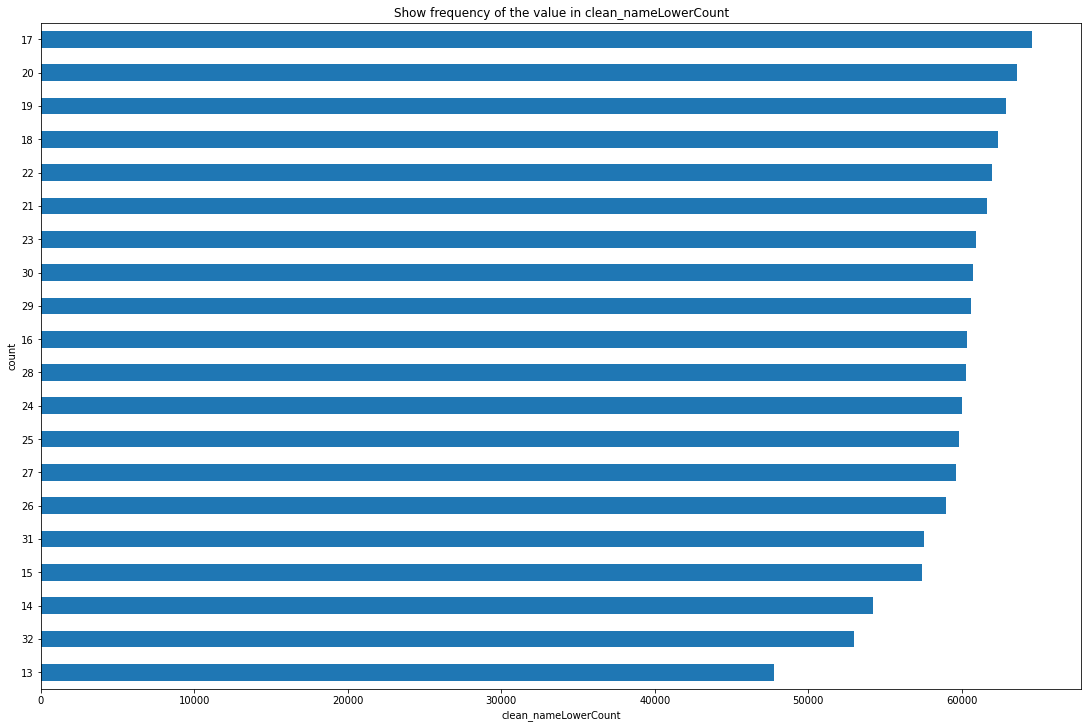

KeyError: 20

In [14]:
# visualize distribution for each column
visualization_str_column_attributes(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481661 entries, 0 to 1482534
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1481661 non-null  int64  
 1   name               1481661 non-null  object 
 2   item_condition_id  1481661 non-null  int64  
 3   brand_name         1481661 non-null  object 
 4   price              1481661 non-null  float64
 5   shipping           1481661 non-null  int64  
 6   item_description   1481661 non-null  object 
 7   c1                 1481661 non-null  object 
 8   c2                 1481661 non-null  object 
 9   c3                 1481661 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 124.3+ MB


# clean text

In [10]:
df['clean_name'] = cleaning_text(df['name'].values)
df['clean_description'] = cleaning_text(df['item_description'].values)
df['c1'] = cleaning_text(df['c1'].values)
df['c2'] = cleaning_text(df['c2'].values)
df['c3'] = cleaning_text(df['c3'].values)
df['brand_name'] = cleaning_text(df['brand_name'].values)

In [11]:
df.head(5)

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,c1,c2,c3,clean_name,clean_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,missing,10.0,1,No description yet,men,men,men,mlb cincinnati reds t shirt size xl,no description yet
1,1,Razer BlackWidow Chroma Keyboard,3,razer,52.0,0,This keyboard is in great condition and works ...,electronics,electronics,electronics,razer blackwidow chroma keyboard,this keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,target,10.0,1,Adorable top with a hint of lace and a key hol...,woman,woman,woman,ava viv blouse,adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,missing,35.0,1,New with tags. Leather horses. Retail for [rm]...,home,home,home,leather horse statues,new with tags leather horses retail for rm eac...
4,4,24K GOLD plated rose,1,missing,44.0,0,Complete with certificate of authenticity,woman,woman,woman,24k gold plated rose,complete with certificate of authenticity


# extract features

In [12]:
# Get word count features
df = get_word_count(df, columns = ["clean_name", "clean_description", 'c1', 'c2', 'c3','brand_name'], print_col=True)

# save error item
error_item = df[df.isnull().any(axis=1)]
error_item.to_csv("data/error_data.csv", index=False)

processing column -- clean_name
processing column -- clean_description
processing column -- c1
processing column -- c2
processing column -- c3
processing column -- brand_name


In [13]:
df.shape

(1481661, 54)

In [18]:
df = df.dropna()
df.shape

(1481082, 54)

In [22]:
# Get special character count features
df = get_special_char_count(df, columns = ["name", "item_description"], print_col=True)
df.drop(["name", "item_description"], axis=1, inplace=True)
df.shape

processing column -- name
processing column -- item_description


(1481082, 58)

In [27]:
df = df.dropna()
df.shape

(1481082, 58)

#  Normalization

In [34]:
# normalize numeric data
df, numeric_column = normalize_numeric_col(df,skip_cols=['train_id','item_condition_id','price','shipping'],
                                            print_process=True)

Normalizing column:  clean_nameWordCount
Normalizing column:  clean_nameLength
Normalizing column:  clean_nameLowerCount
Normalizing column:  clean_nameLowerRatio
Normalizing column:  clean_nameAvgWordLen
Normalizing column:  clean_descriptionWordCount
Normalizing column:  clean_descriptionLength
Normalizing column:  clean_descriptionLowerCount
Normalizing column:  clean_descriptionLowerRatio
Normalizing column:  clean_descriptionAvgWordLen
Normalizing column:  c1WordCount
Normalizing column:  c1Length
Normalizing column:  c1LowerCount
Normalizing column:  c1LowerRatio
Normalizing column:  c1AvgWordLen
Normalizing column:  c2WordCount
Normalizing column:  c2Length
Normalizing column:  c2LowerCount
Normalizing column:  c2LowerRatio
Normalizing column:  c2AvgWordLen
Normalizing column:  c3WordCount
Normalizing column:  c3Length
Normalizing column:  c3LowerCount
Normalizing column:  c3LowerRatio
Normalizing column:  c3AvgWordLen
Normalizing column:  brand_nameWordCount
Normalizing column:

In [32]:
df.shape

(1481082, 46)

In [35]:
df.describe()

,train_id,item_condition_id,price,shipping,clean_nameWordCount,clean_nameLength,clean_nameLowerCount,clean_nameLowerRatio,clean_nameAvgWordLen,clean_descriptionWordCount,...,brand_nameLength,brand_nameLowerCount,brand_nameLowerRatio,brand_nameAvgWordLen,nameStopWordCount,namePunctuationCount,nameSpecialCount,item_descriptionStopWordCount,item_descriptionPunctuationCount,item_descriptionSpecialCount
count,1.481082e+06,1.481082e+06,1.481082e+06,1.481082e+06,1.481082e+06,1.481082e+06,1.481082e+06,1.481082e+06,1.481082e+06,1.481082e+06,...,1.481082e+06,1.481082e+06,1.481082e+06,1.481082e+06,1.481082e+06,1.481082e+06,1.481082e+06,1.481082e+06,1.481082e+06,1.481082e+06
mean,7.412451e+05,1.907343e+00,2.675518e+01,4.473257e-01,2.193899e-01,6.115342e-01,5.372395e-01,8.498238e-01,1.226087e-01,9.313009e-02,...,1.916952e-01,2.277369e-01,9.709890e-01,3.773721e-01,2.438150e-02,1.378482e-02,6.527962e-03,5.968989e-02,1.114337e-02,6.502160e-03
std,4.279731e+05,9.031734e-01,3.859665e+01,4.972178e-01,1.070337e-01,2.255941e-01,1.874655e-01,6.509984e-02,2.924848e-02,1.138044e-01,...,9.649932e-02,9.037684e-02,5.844446e-02,1.070455e-01,5.495129e-02,2.758034e-02,1.874589e-02,8.693466e-02,1.845976e-02,1.318225e-02
min,0.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.705902e+05,1.000000e+00,1.000000e+01,0.000000e+00,1.250000e-01,4.250000e-01,4.000000e-01,8.214286e-01,1.025641e-01,2.238806e-02,...,1.621622e-01,2.058824e-01,9.565217e-01,2.857143e-01,0.000000e+00,0.000000e+00,0.000000e+00,8.196721e-03,1.915709e-03,0.000000e+00
50%,7.412465e+05,2.000000e+00,1.700000e+01,0.000000e+00,1.875000e-01,6.250000e-01,5.500000e-01,8.620690e-01,1.196581e-01,5.223881e-02,...,1.621622e-01,2.058824e-01,1.000000e+00,4.285714e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.459016e-02,5.747126e-03,2.366864e-03
75%,1.111879e+06,3.000000e+00,2.900000e+01,1.000000e+00,3.125000e-01,8.000000e-01,7.000000e-01,8.888889e-01,1.410256e-01,1.156716e-01,...,2.162162e-01,2.352941e-01,1.000000e+00,4.285714e-01,0.000000e+00,3.448276e-02,0.000000e+00,7.377049e-02,1.340996e-02,7.100592e-03
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [36]:
df.to_csv("data/clean_data_with_text_features.csv", index=False)

# Visualization

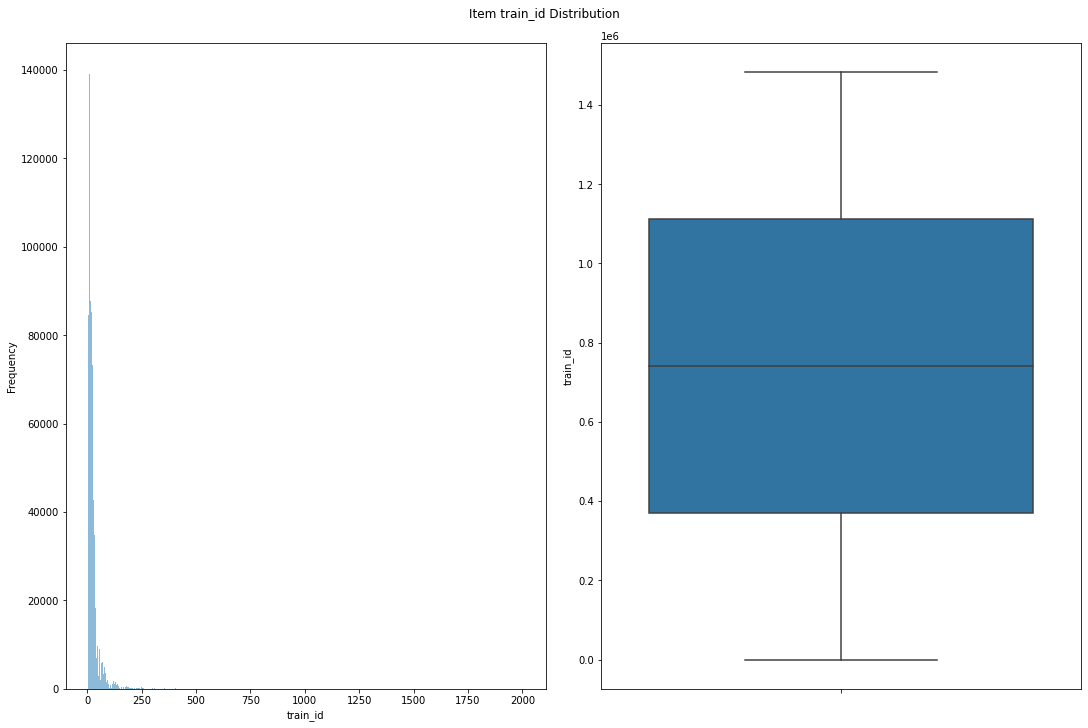

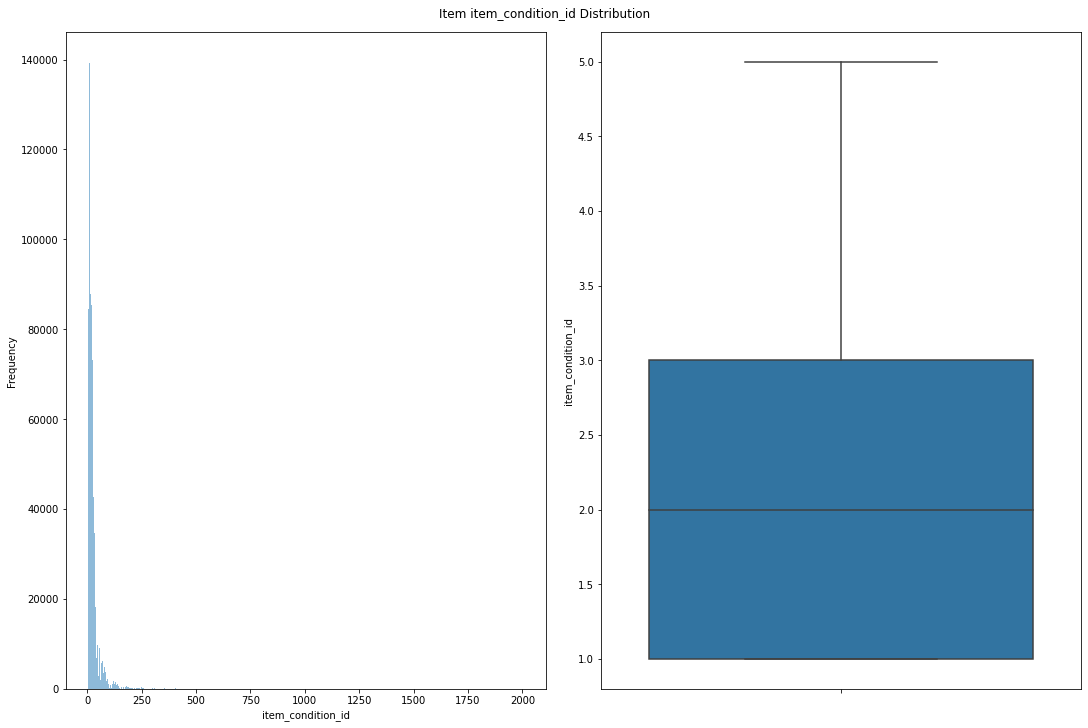

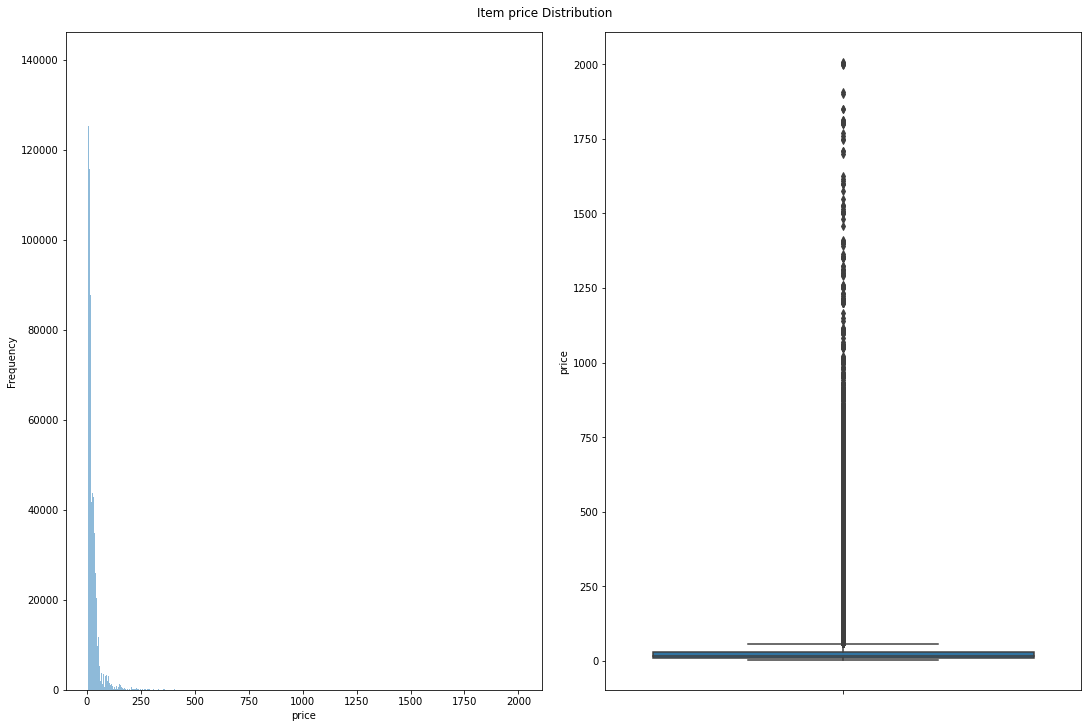

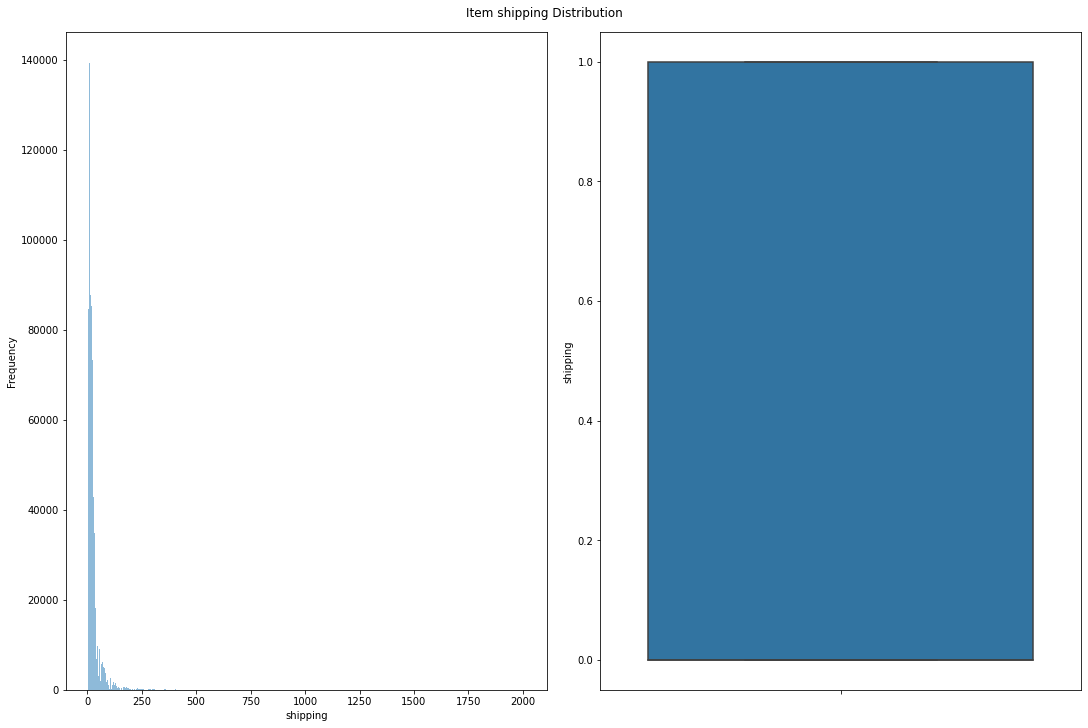

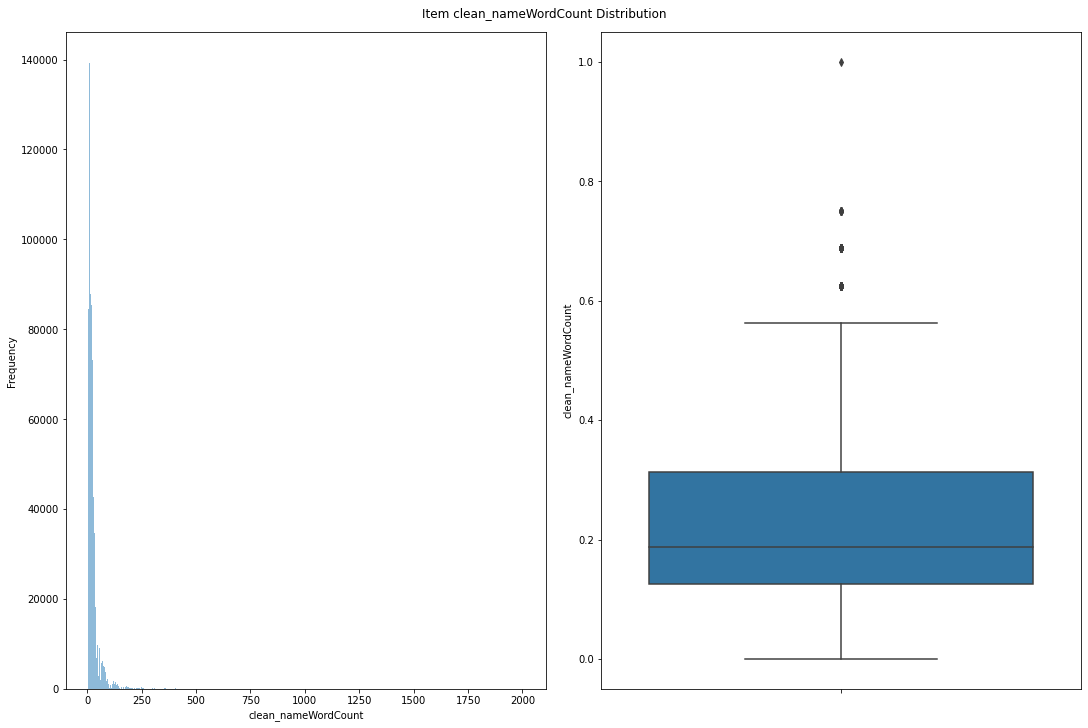

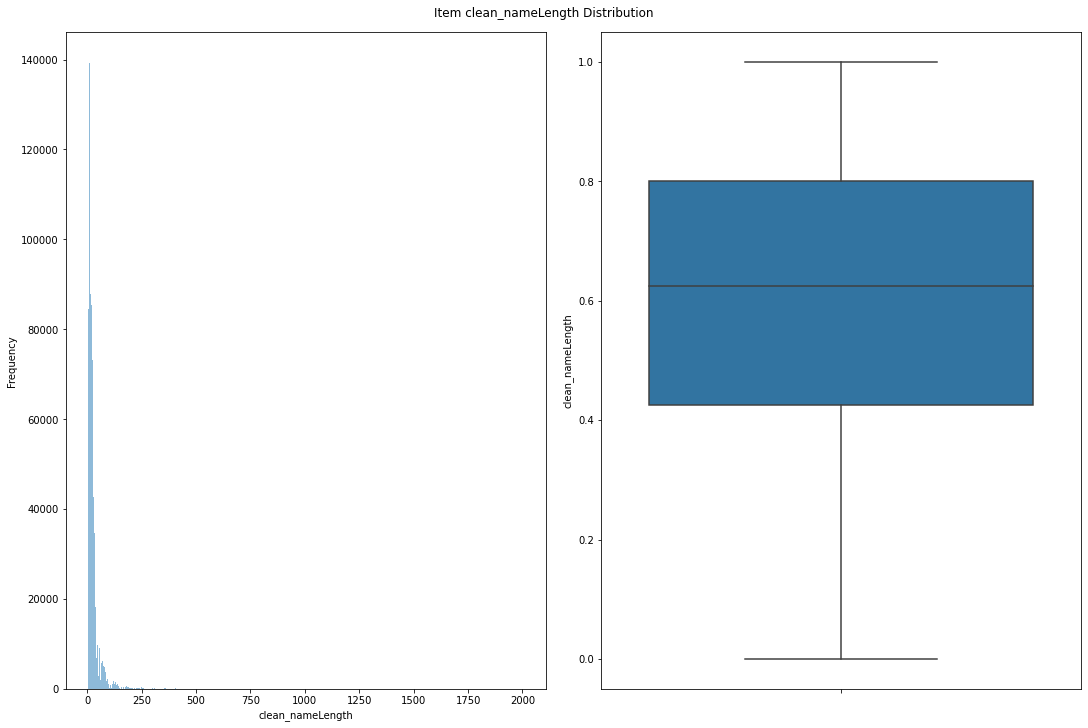

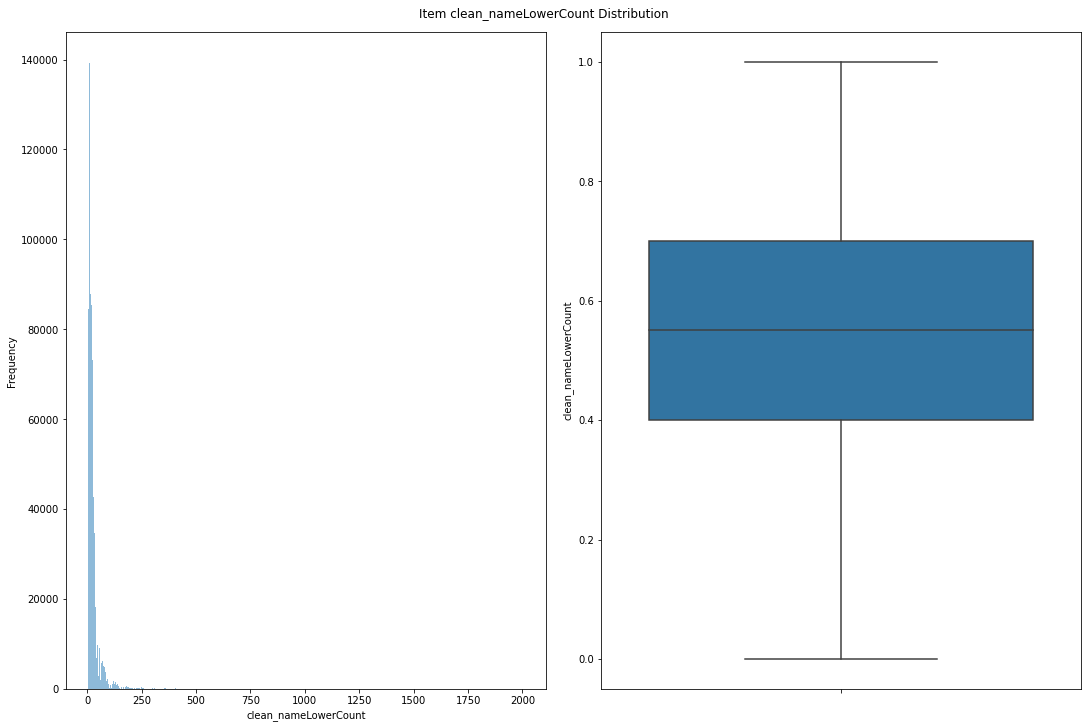

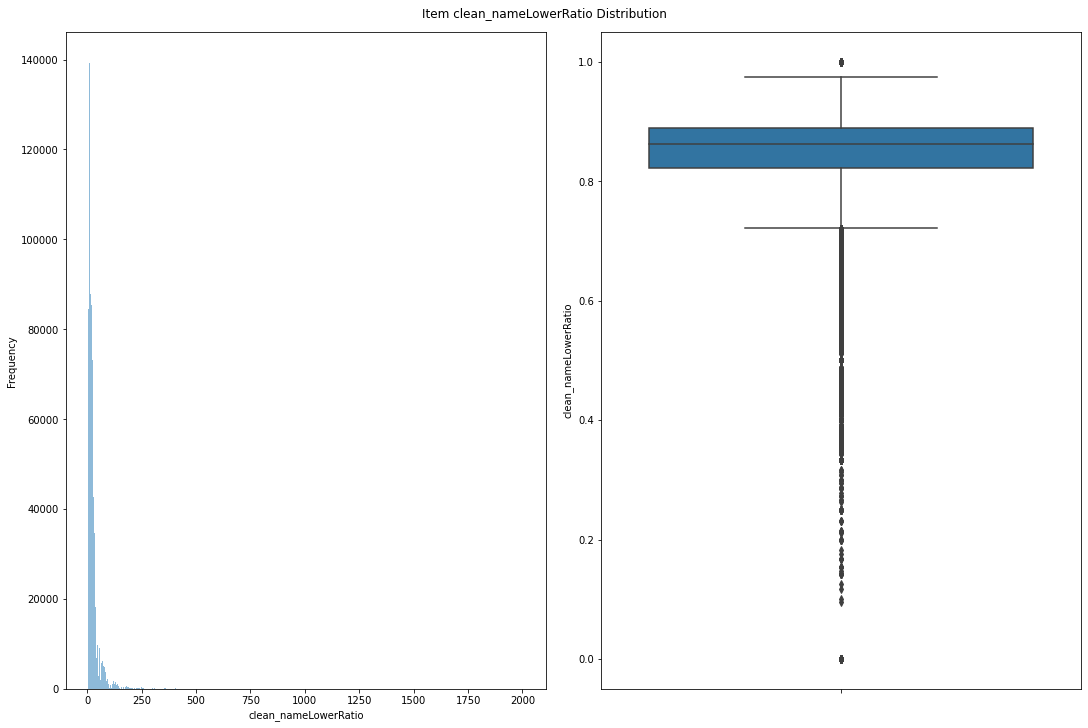

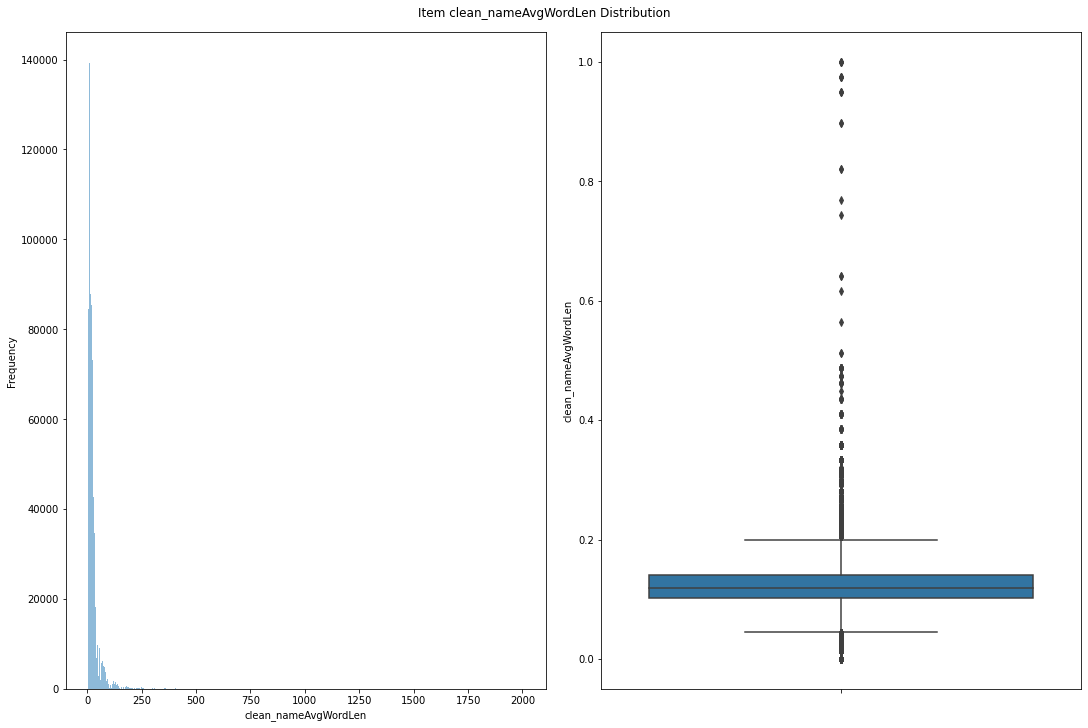

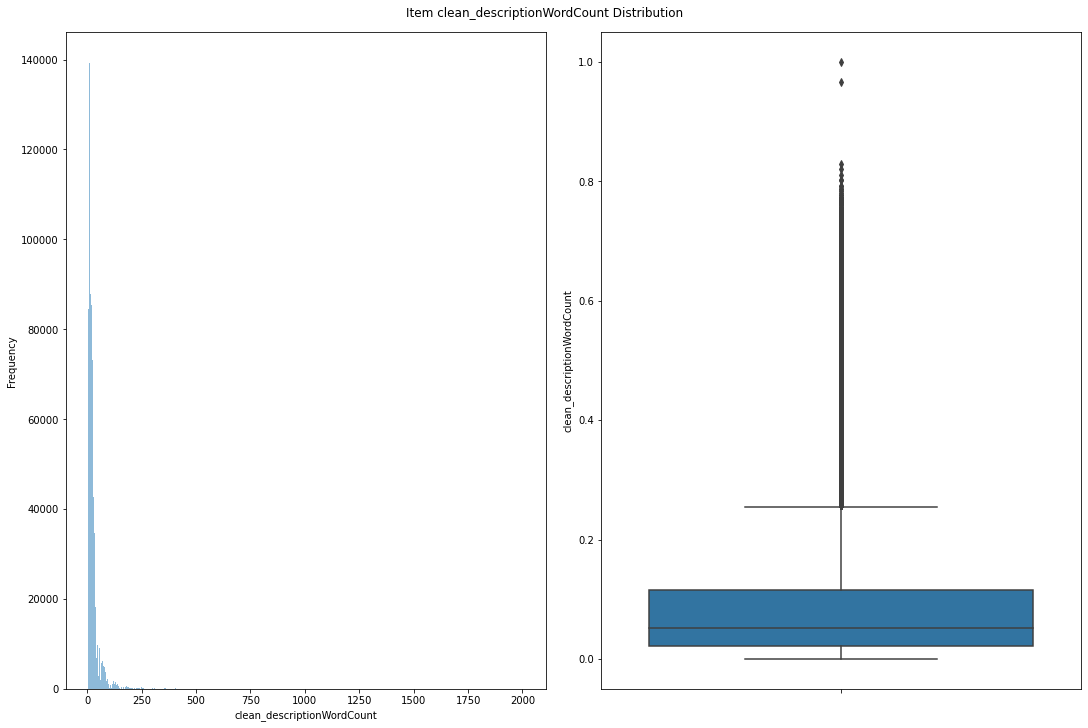

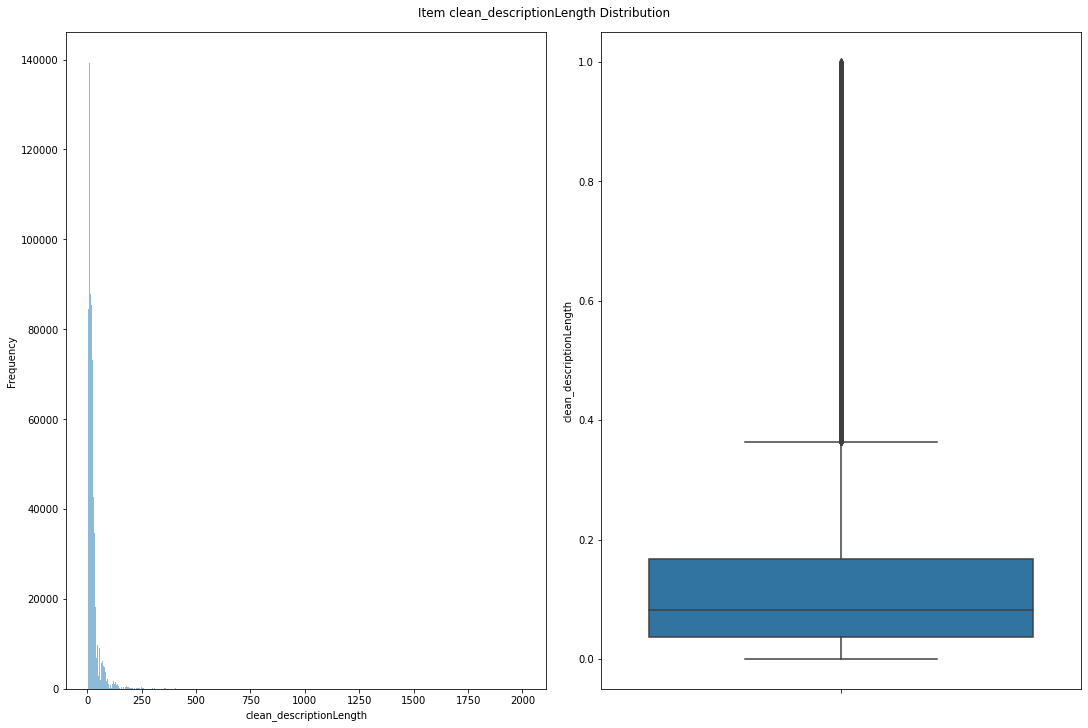

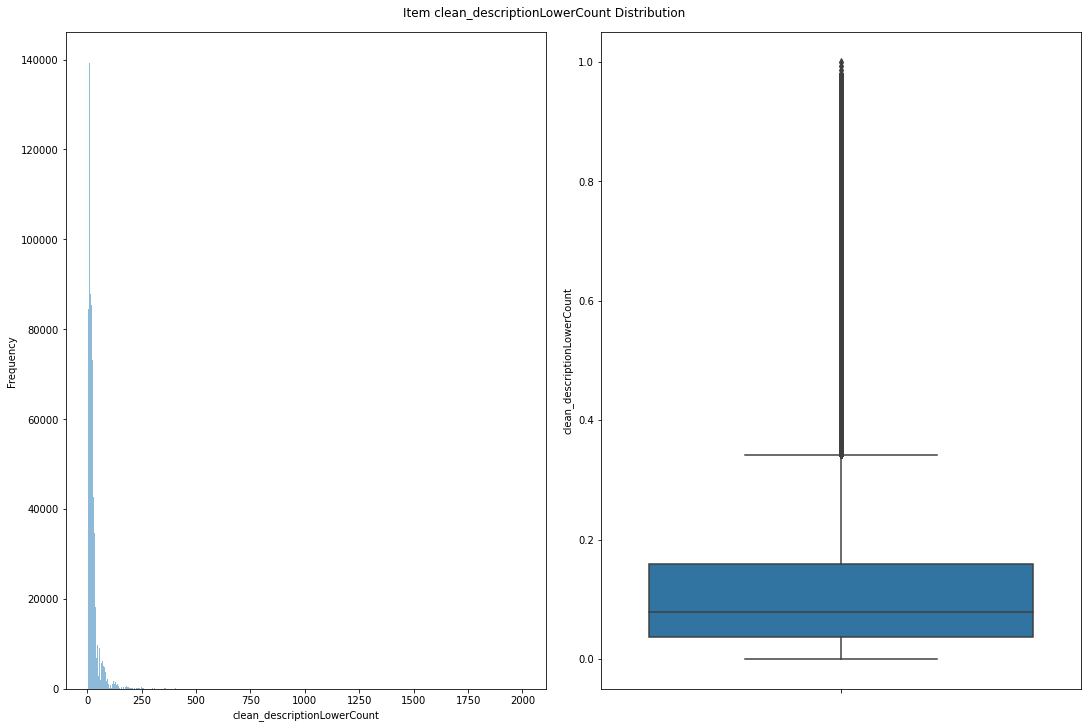

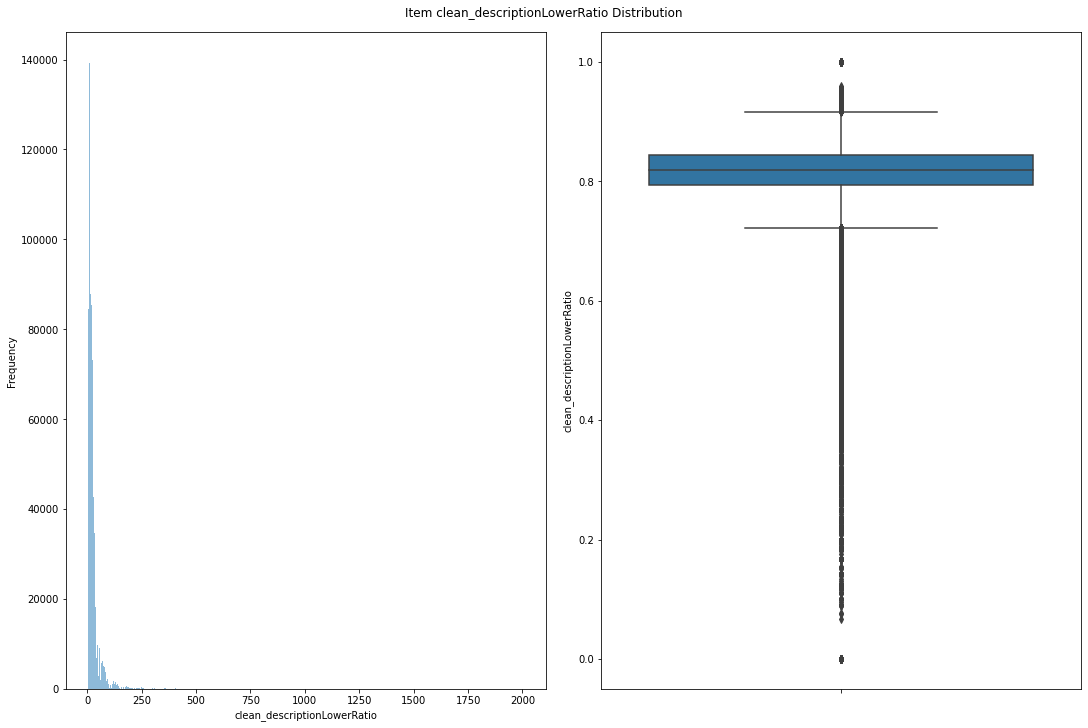

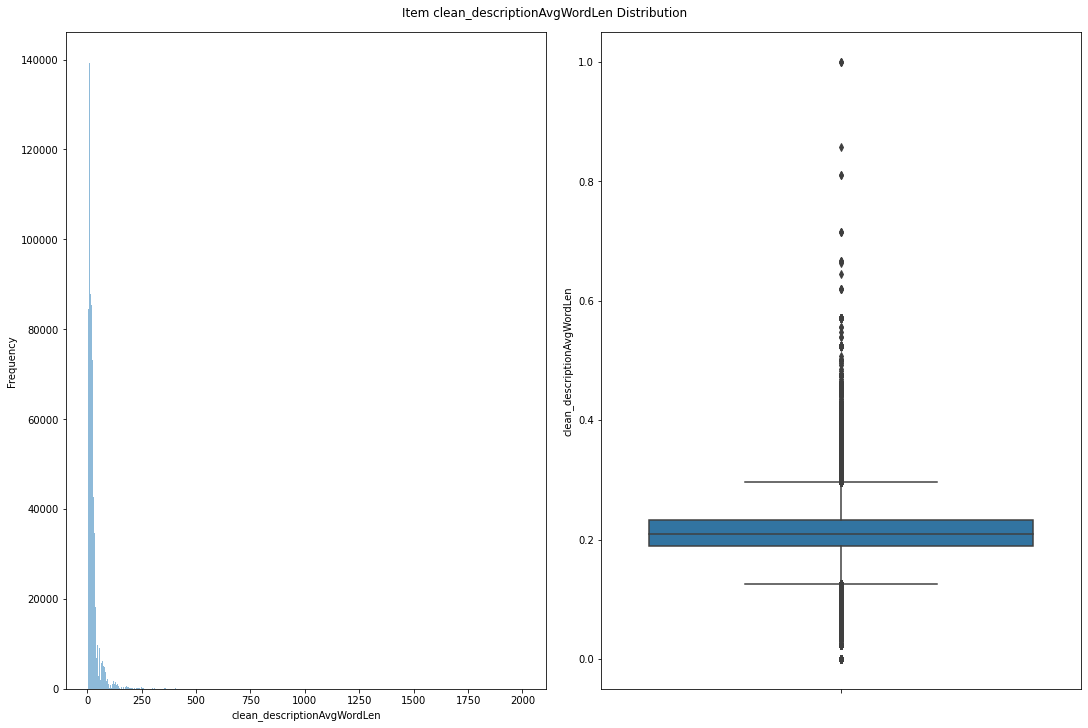

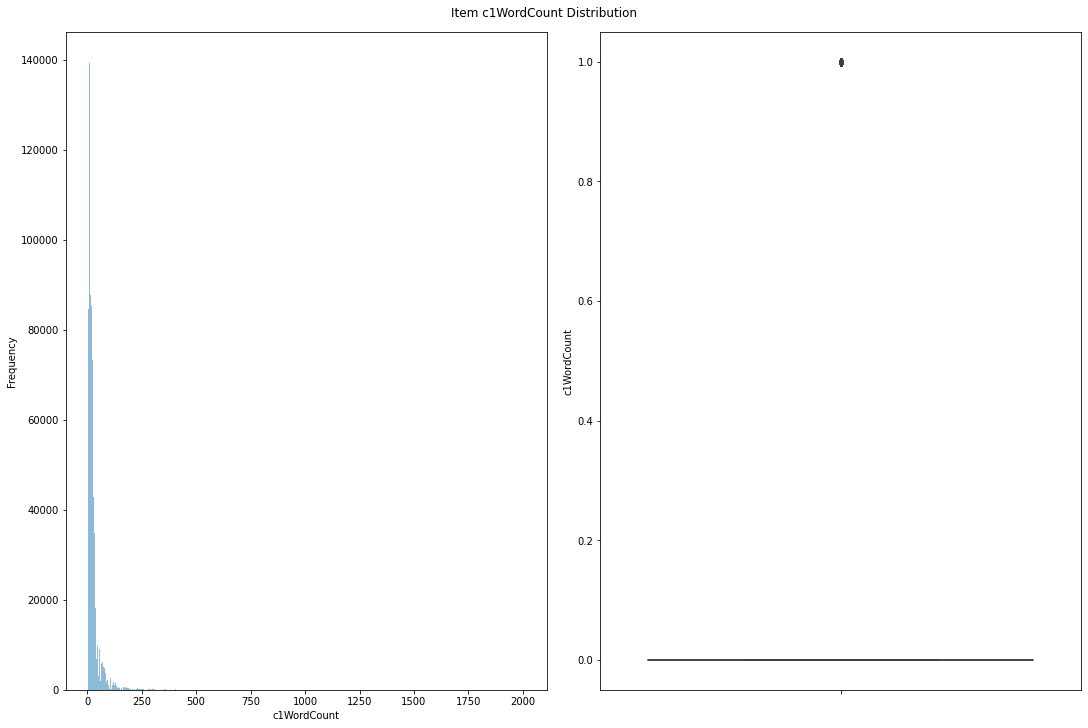

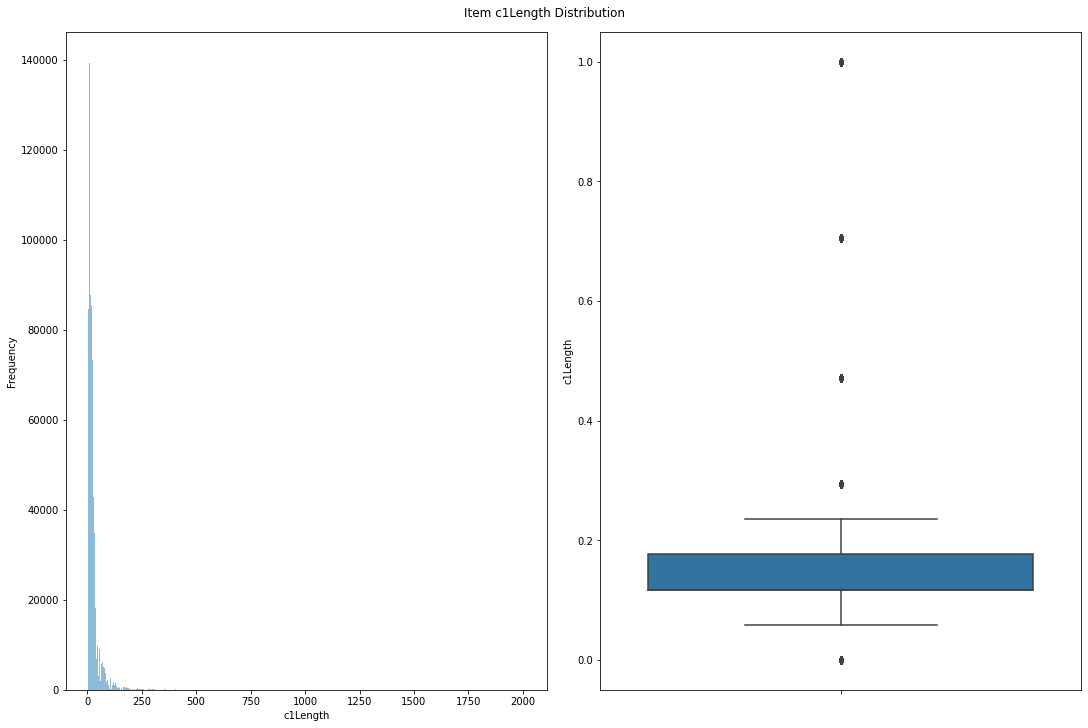

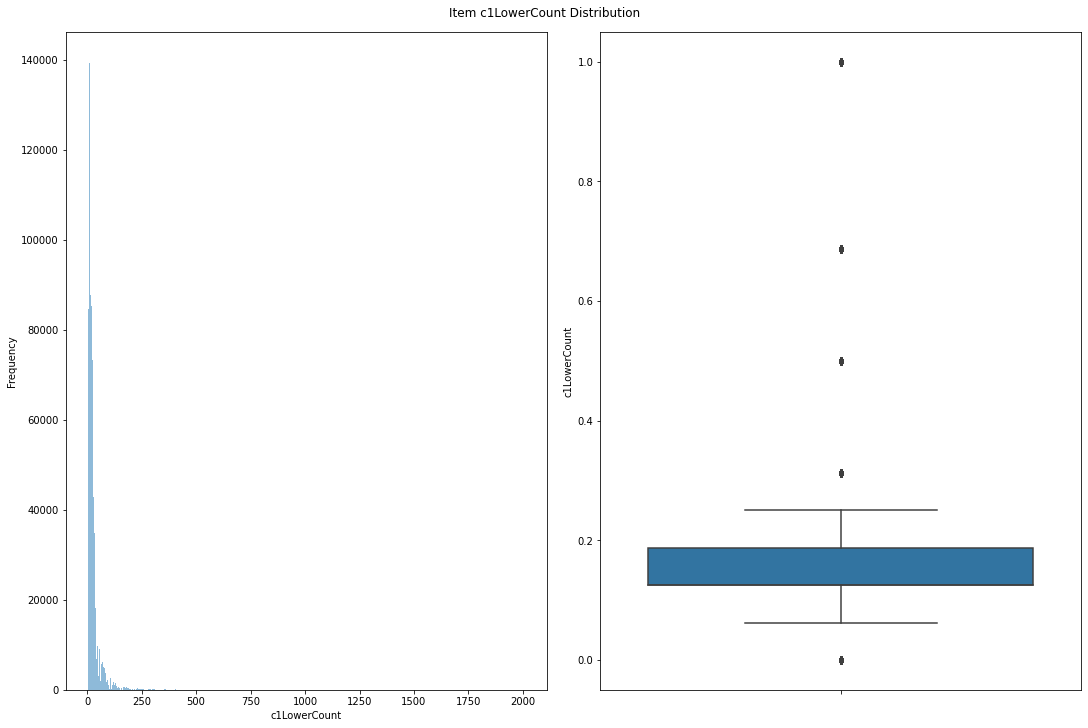

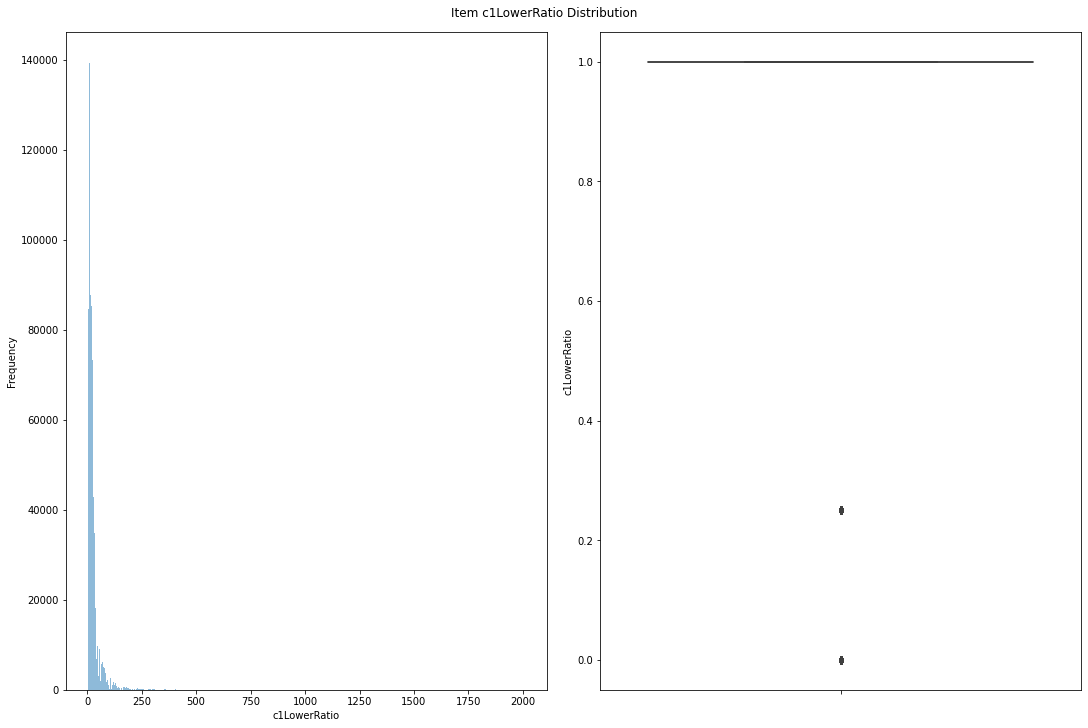

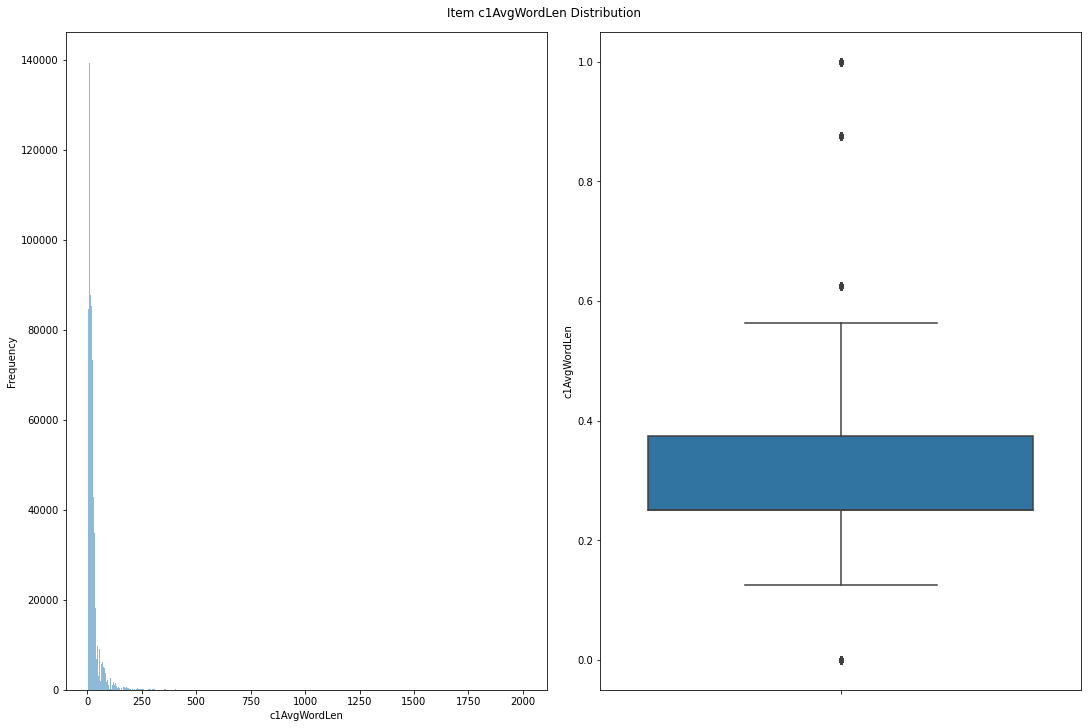

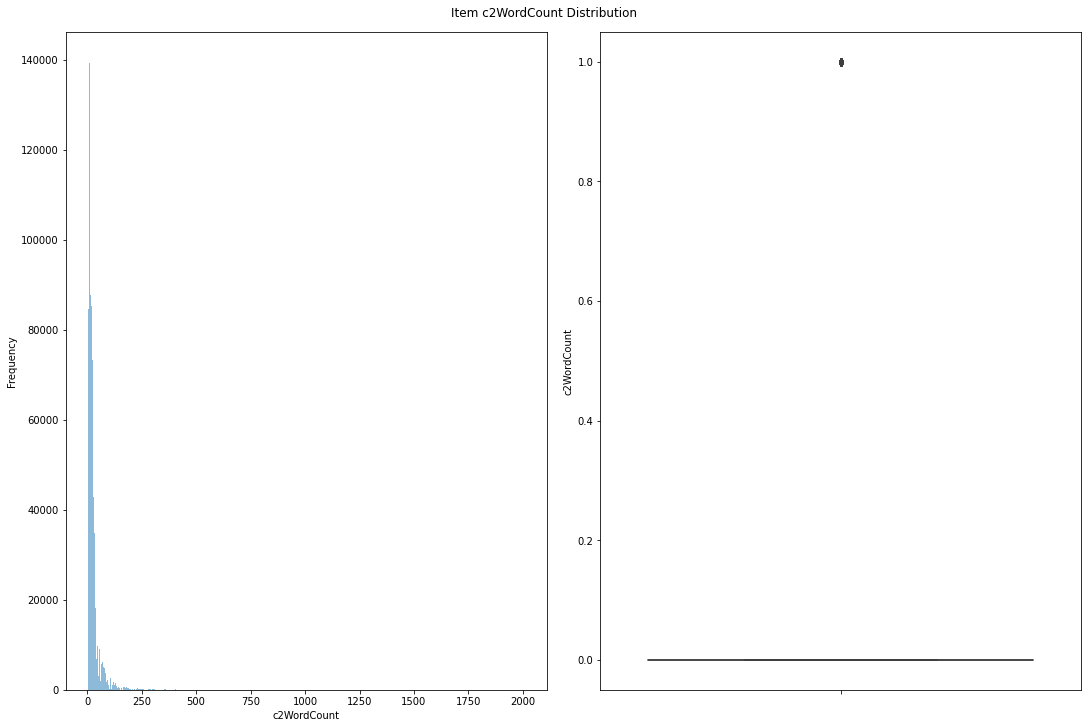

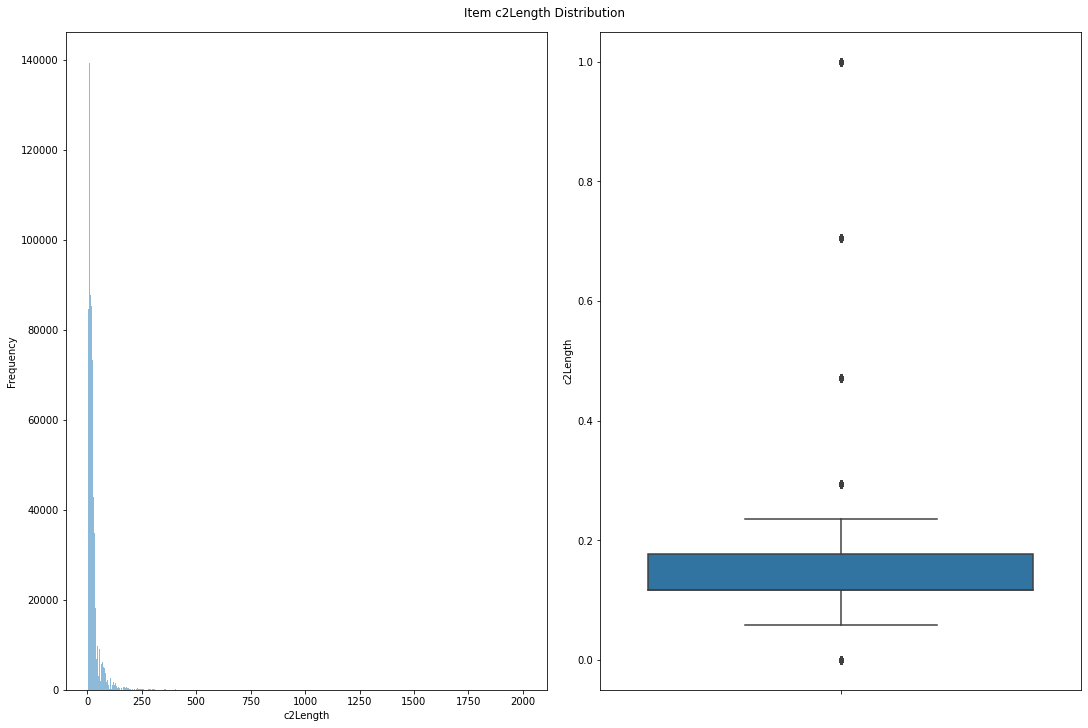

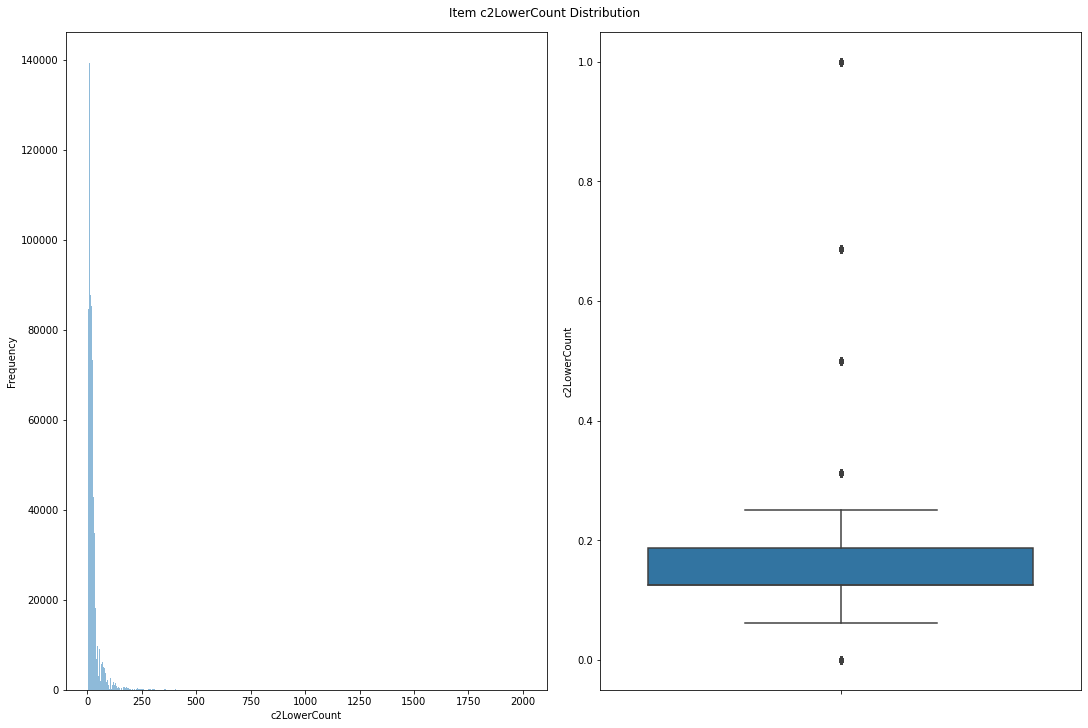

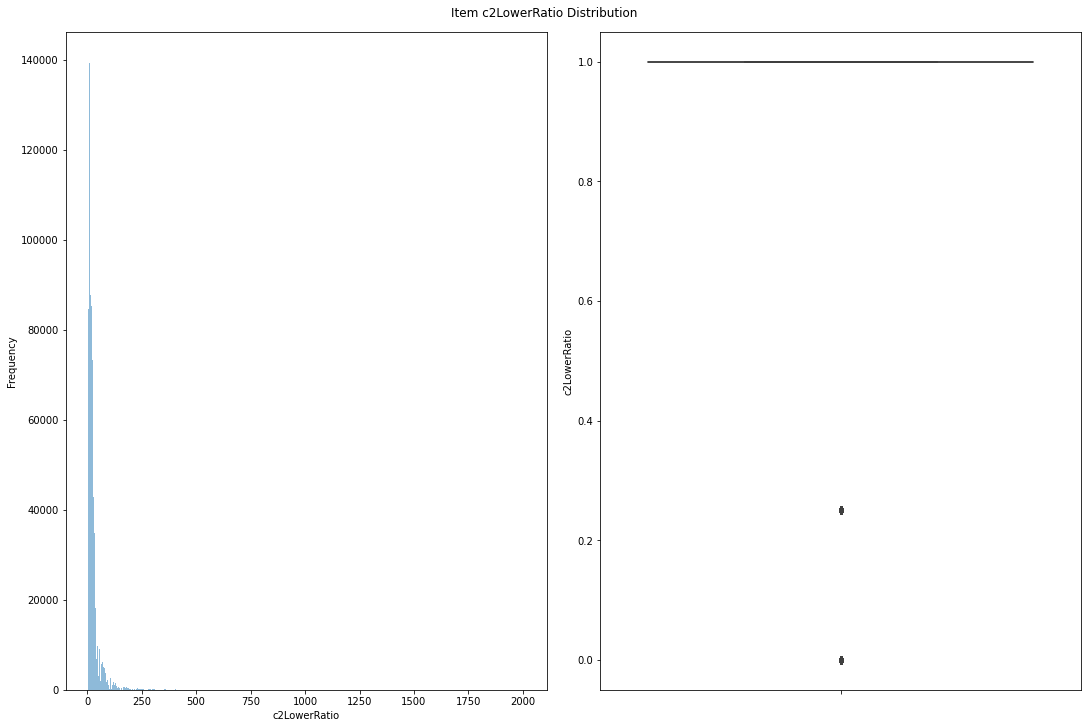

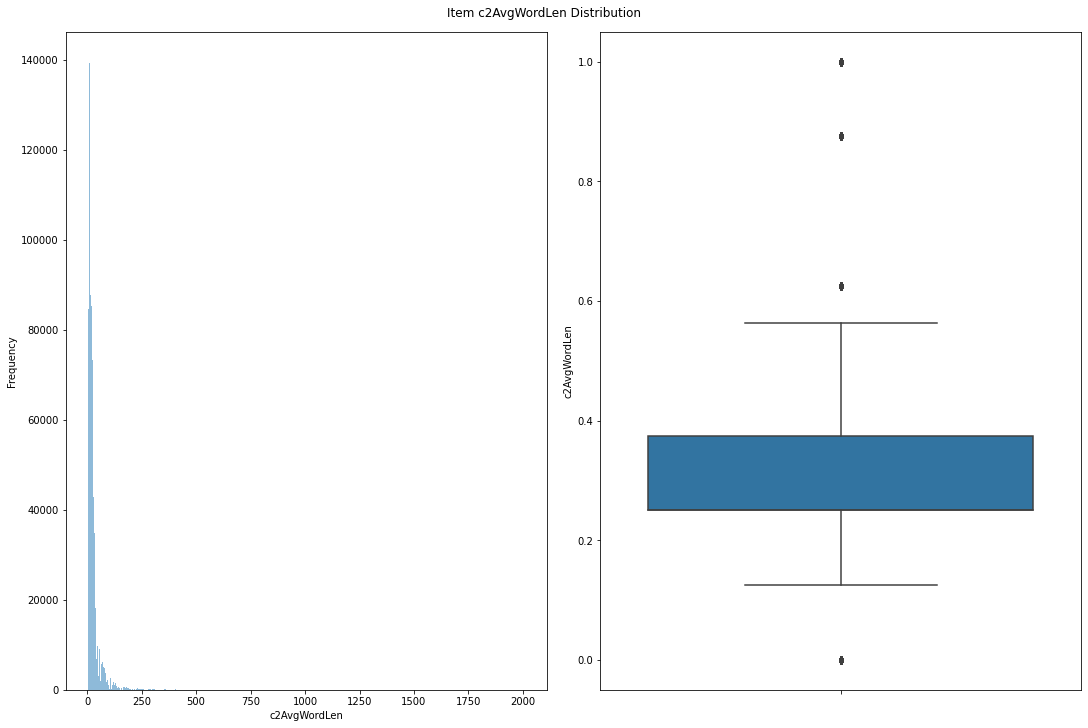

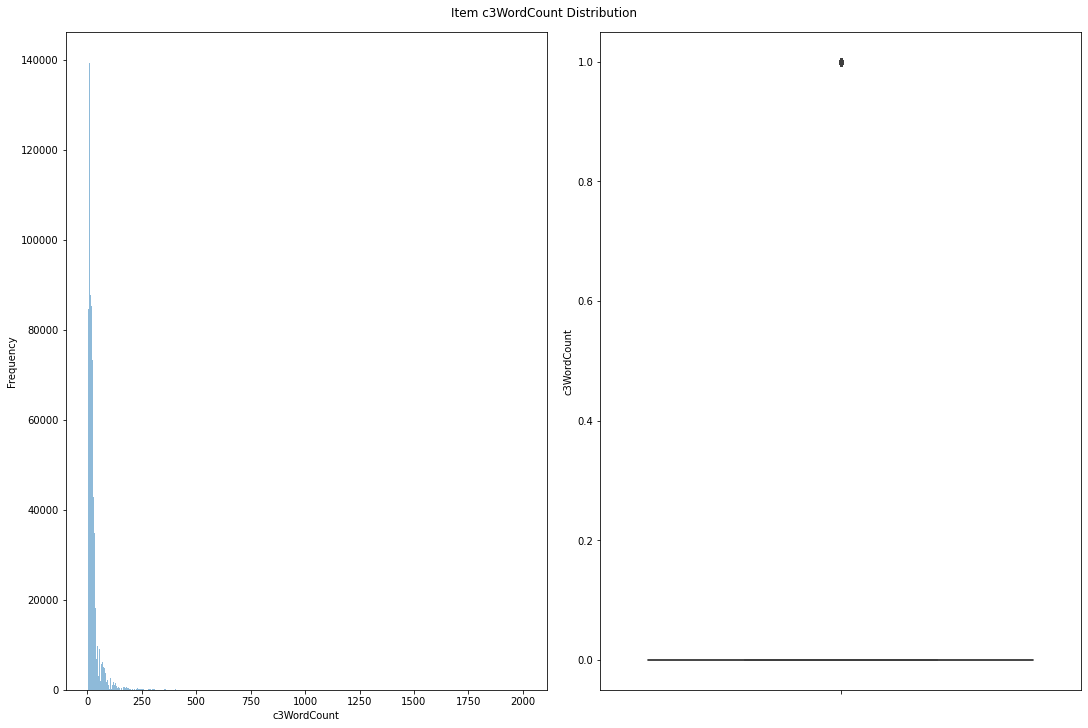

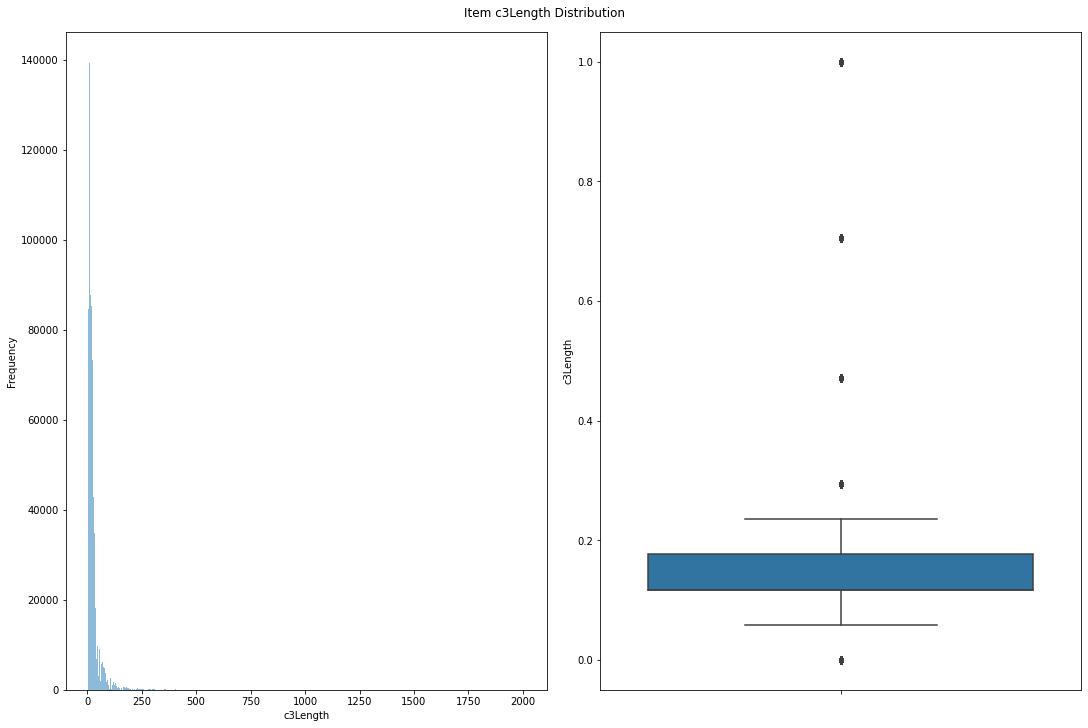

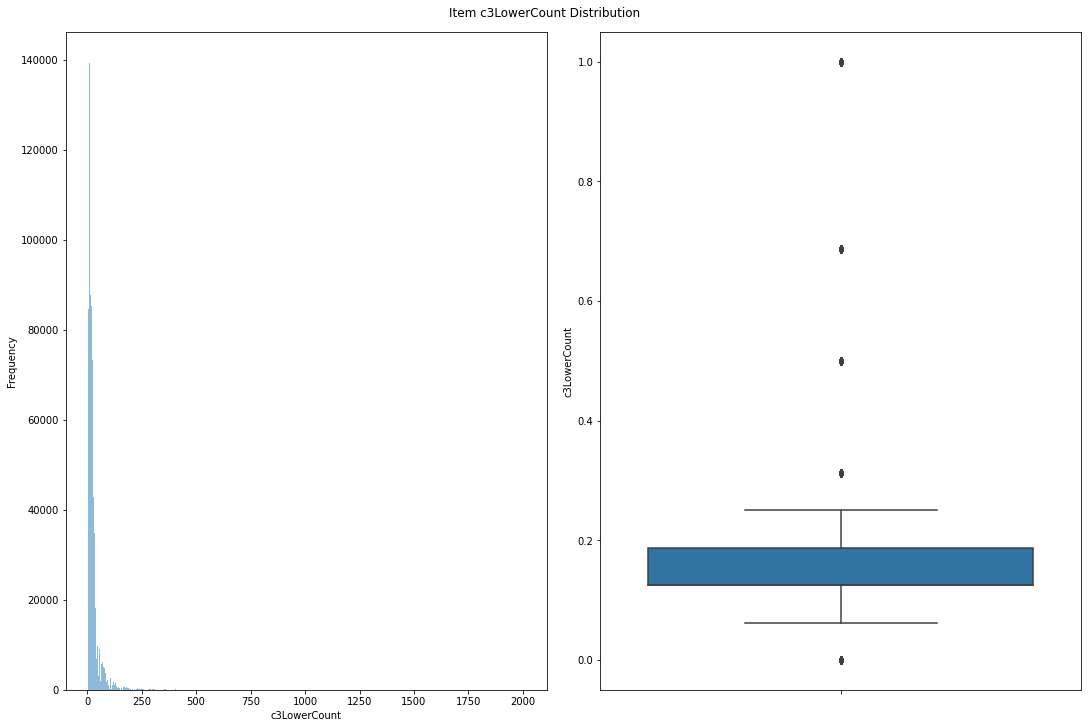

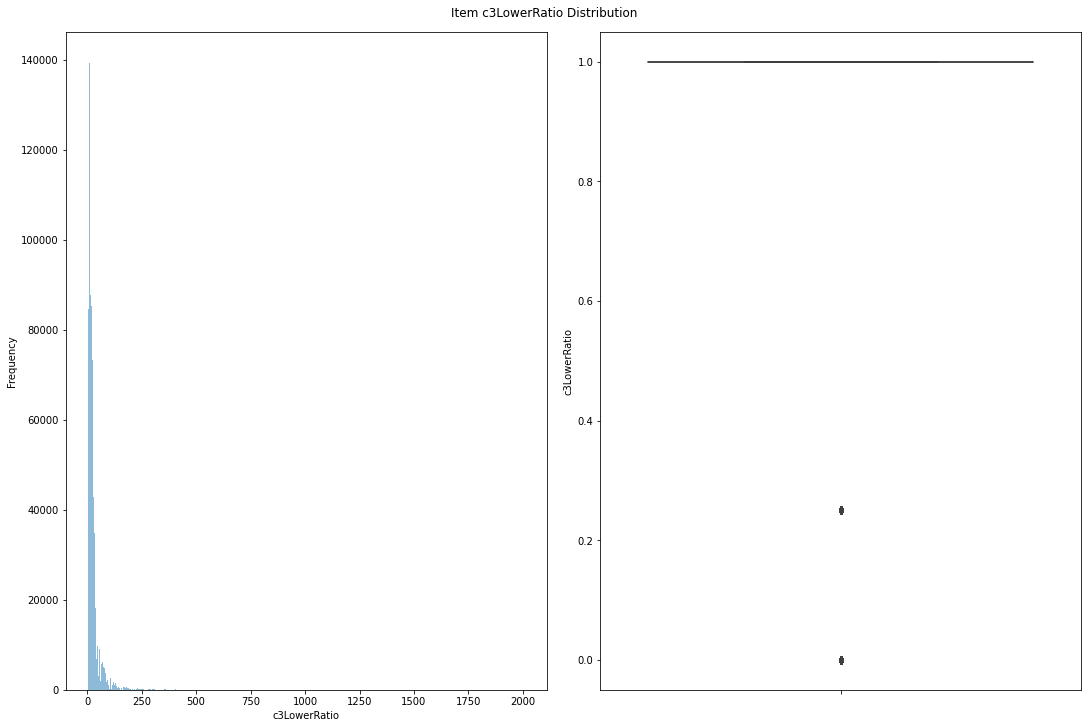

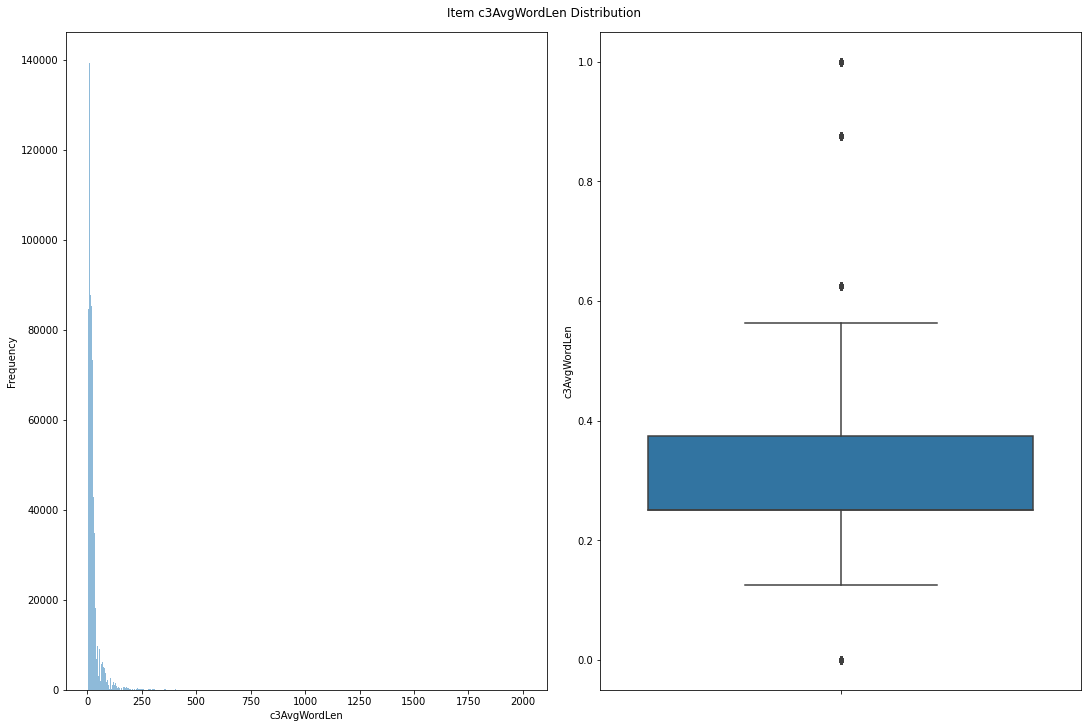

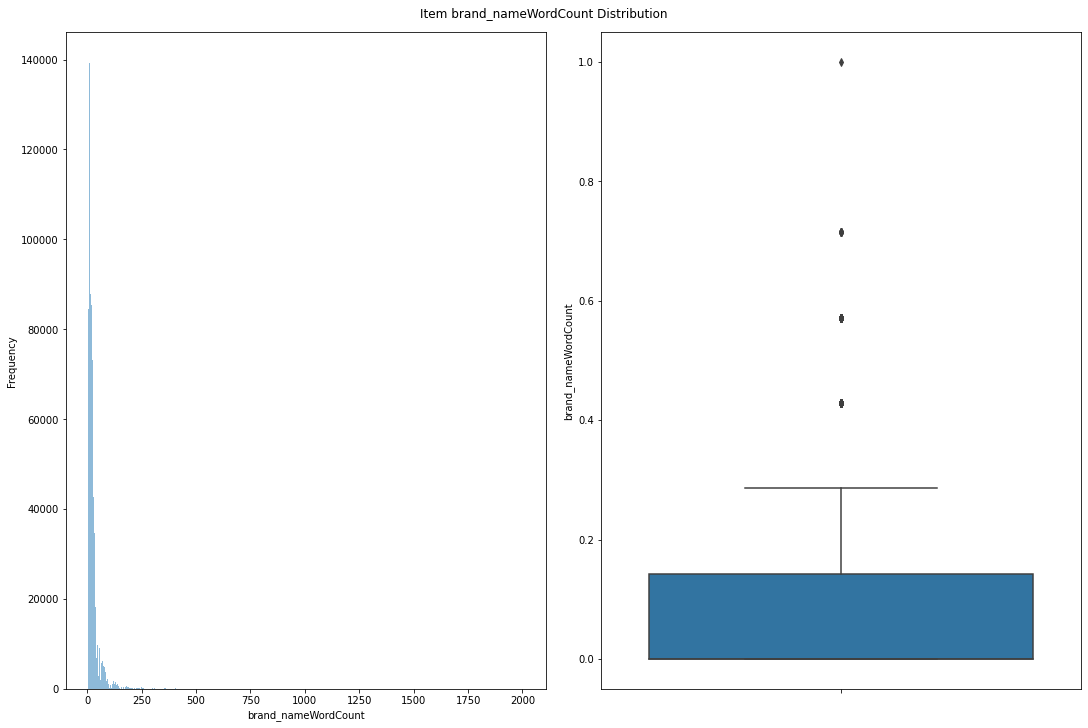

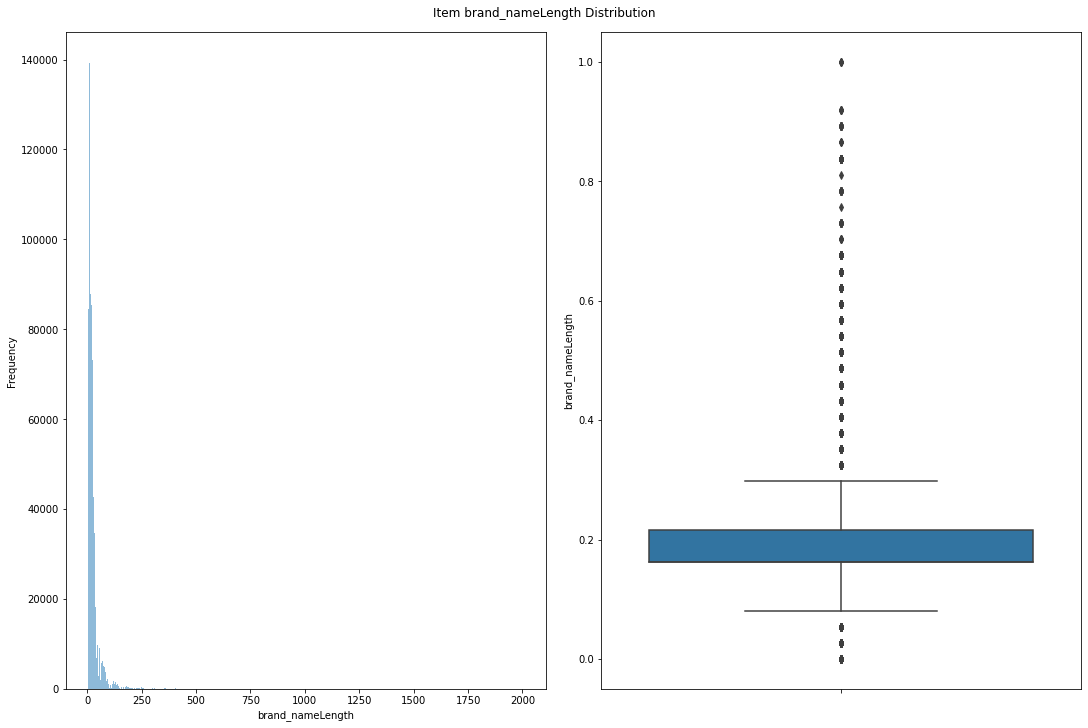

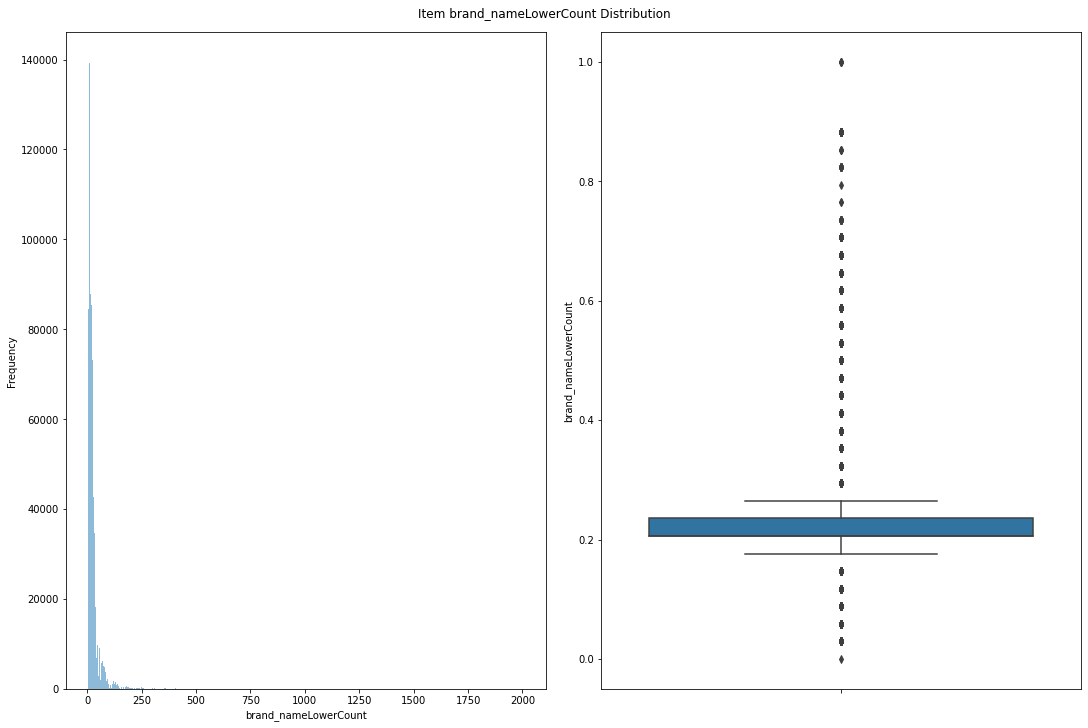

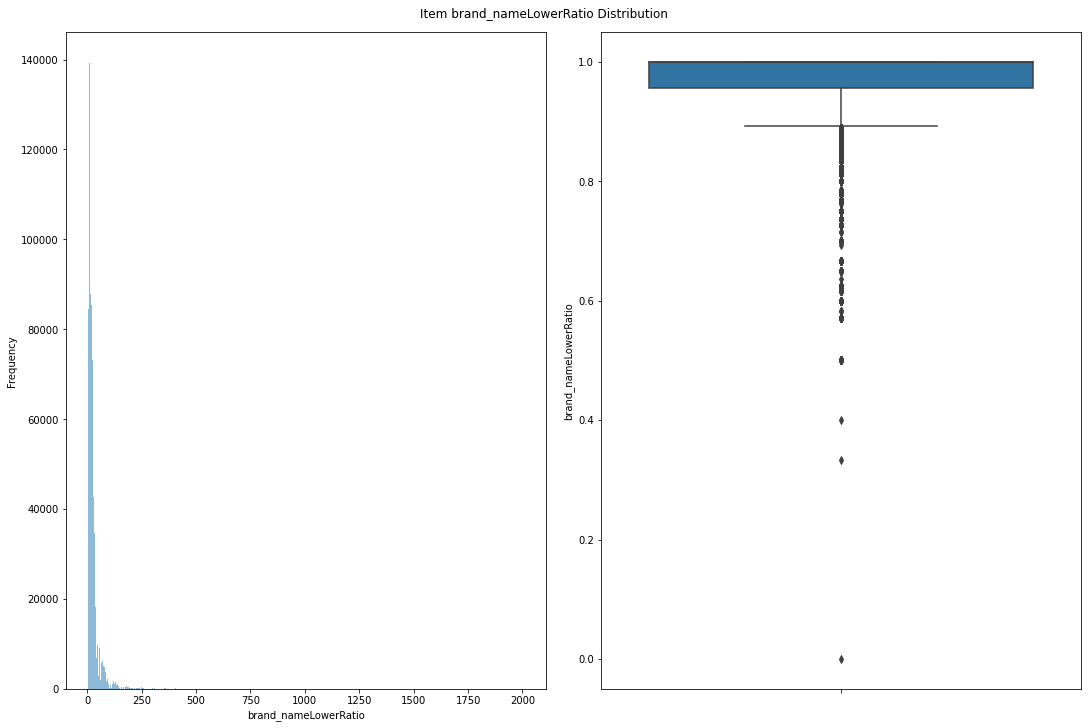

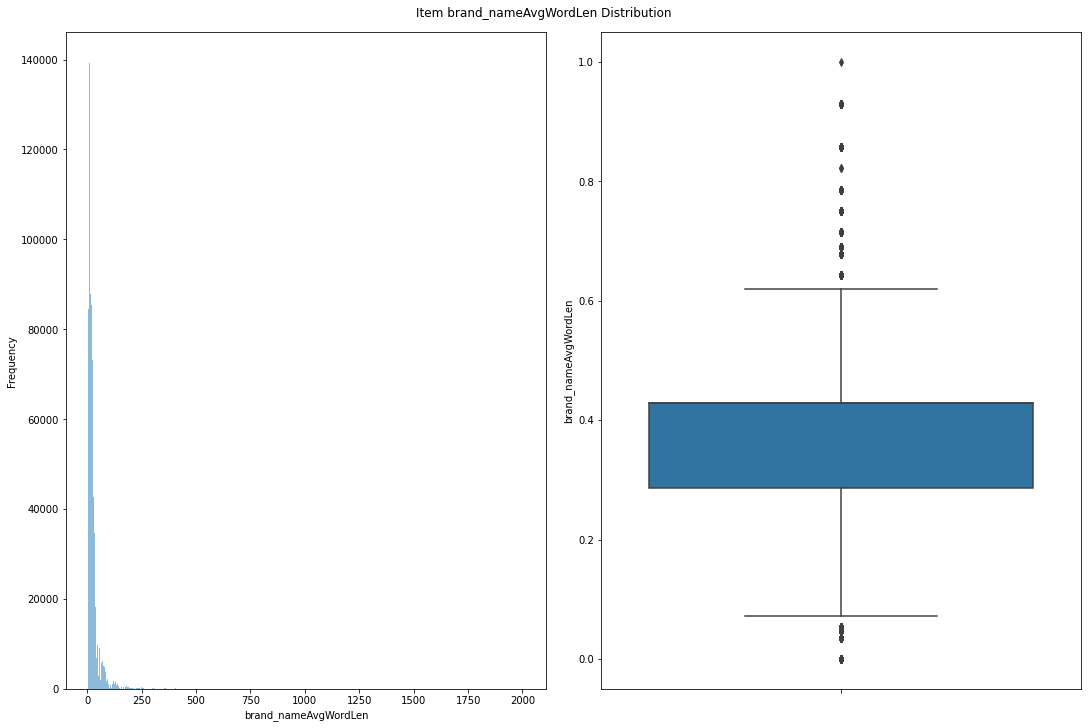

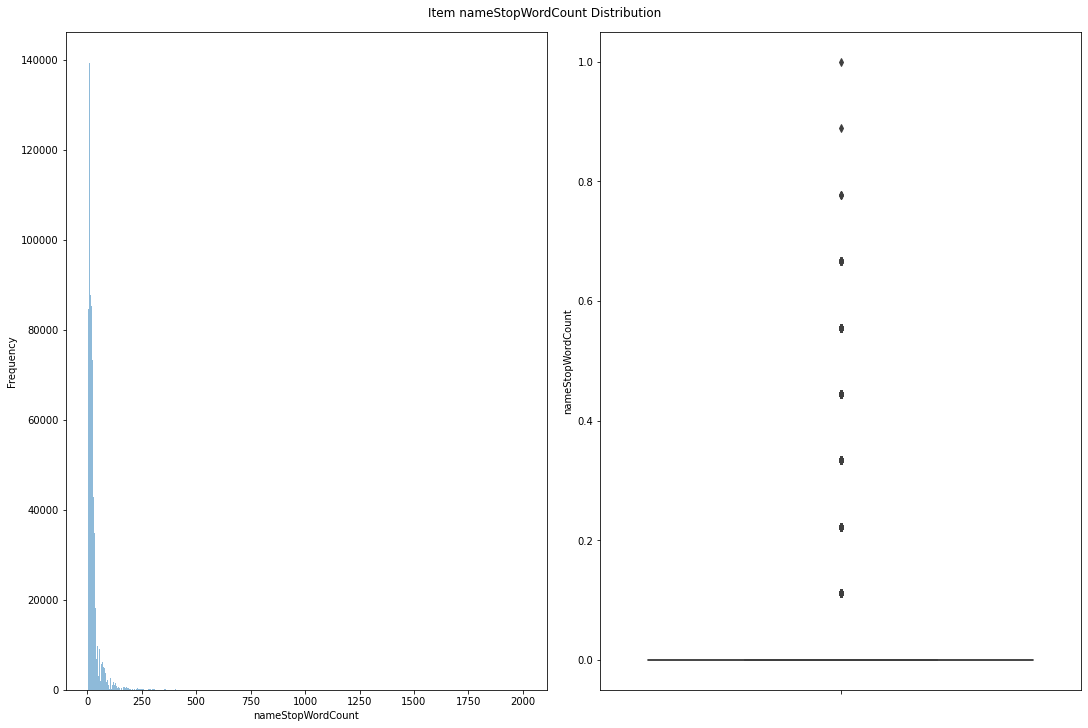

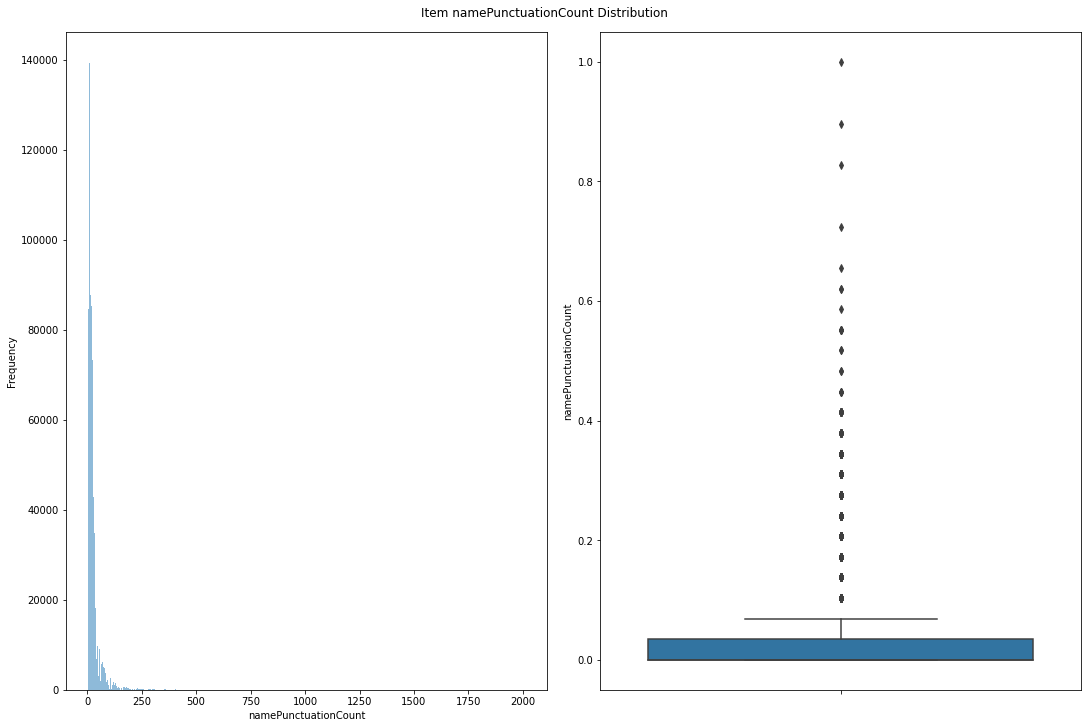

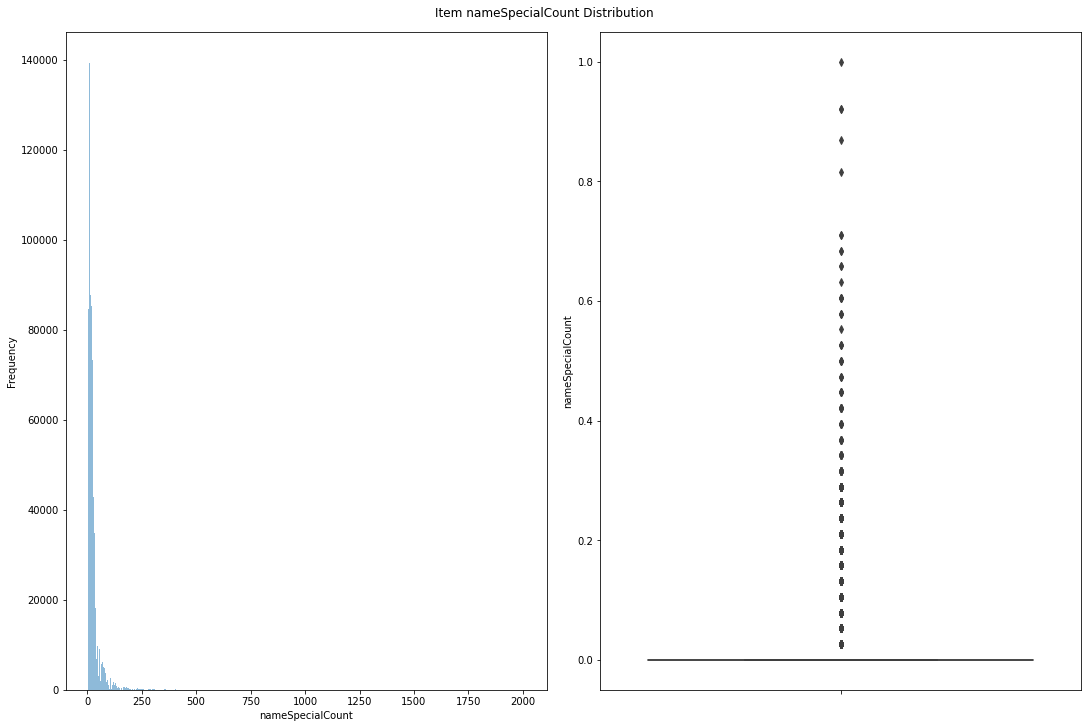

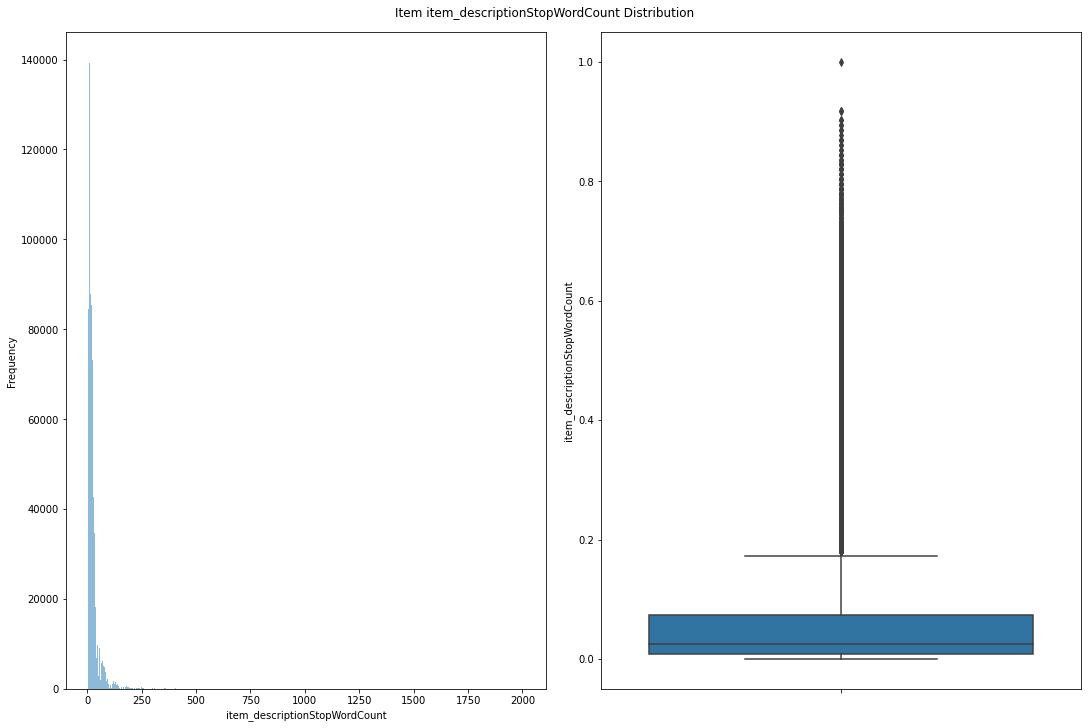

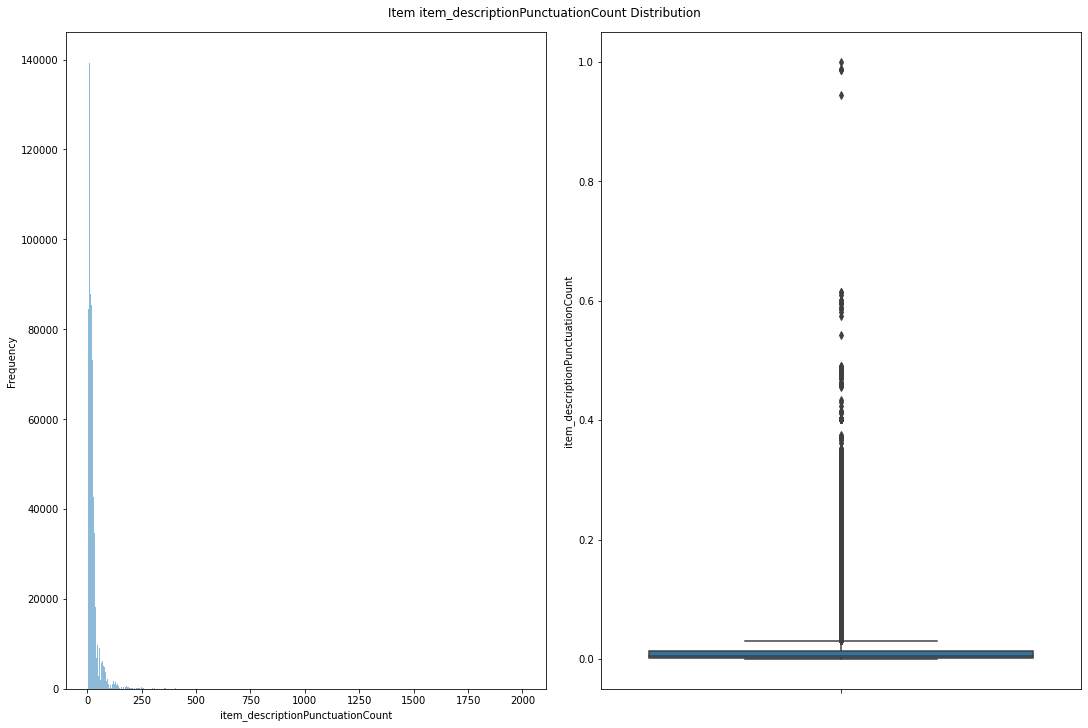

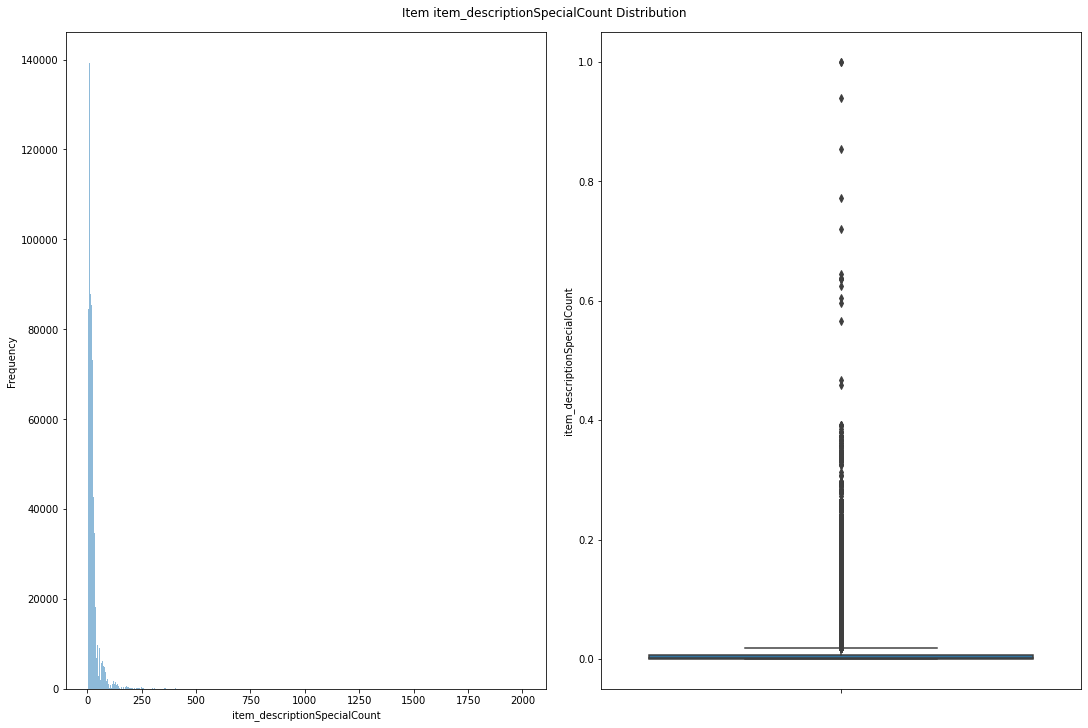

In [37]:
visualization_numeric_distribution(df,numeric_column)

## Correlation Matrices

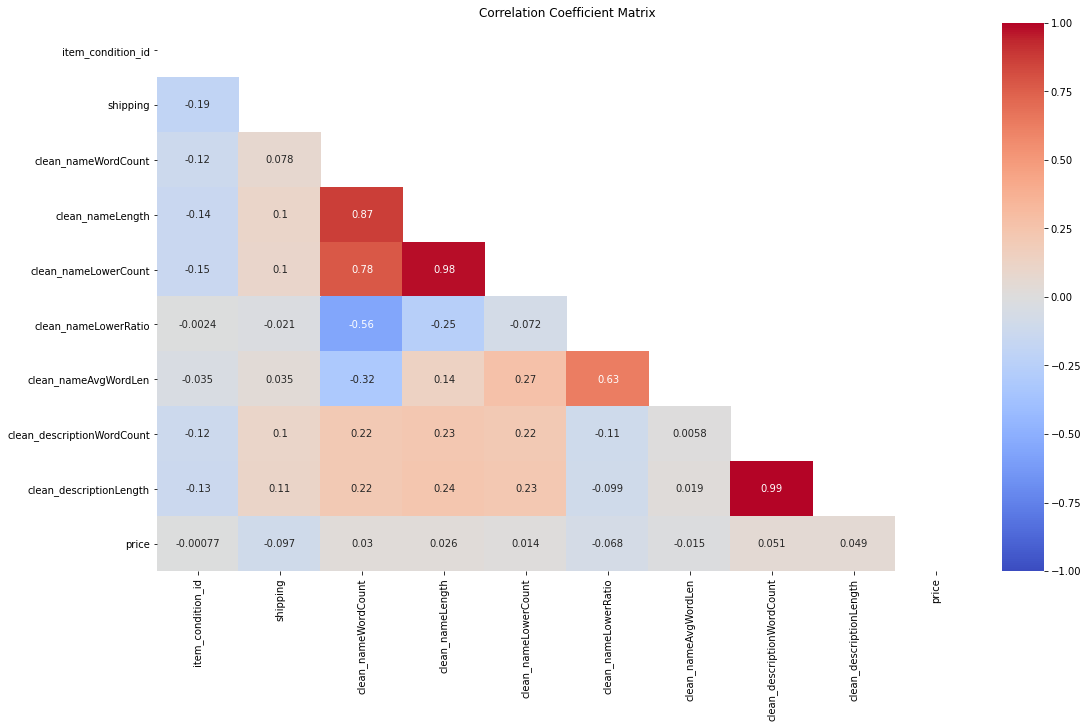

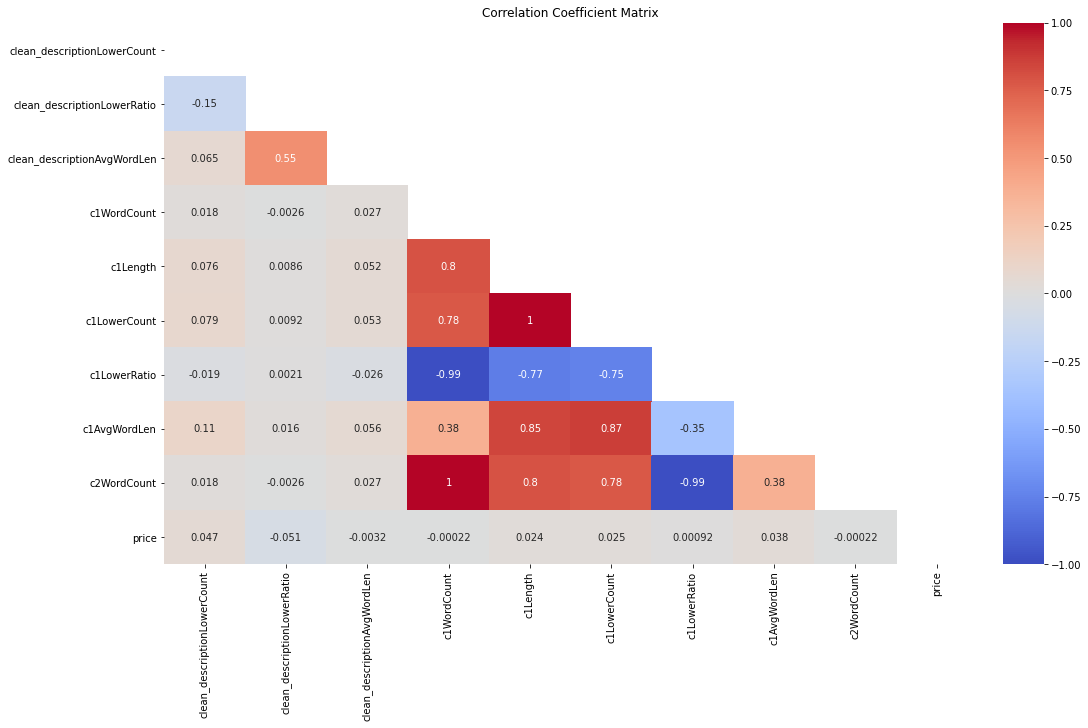

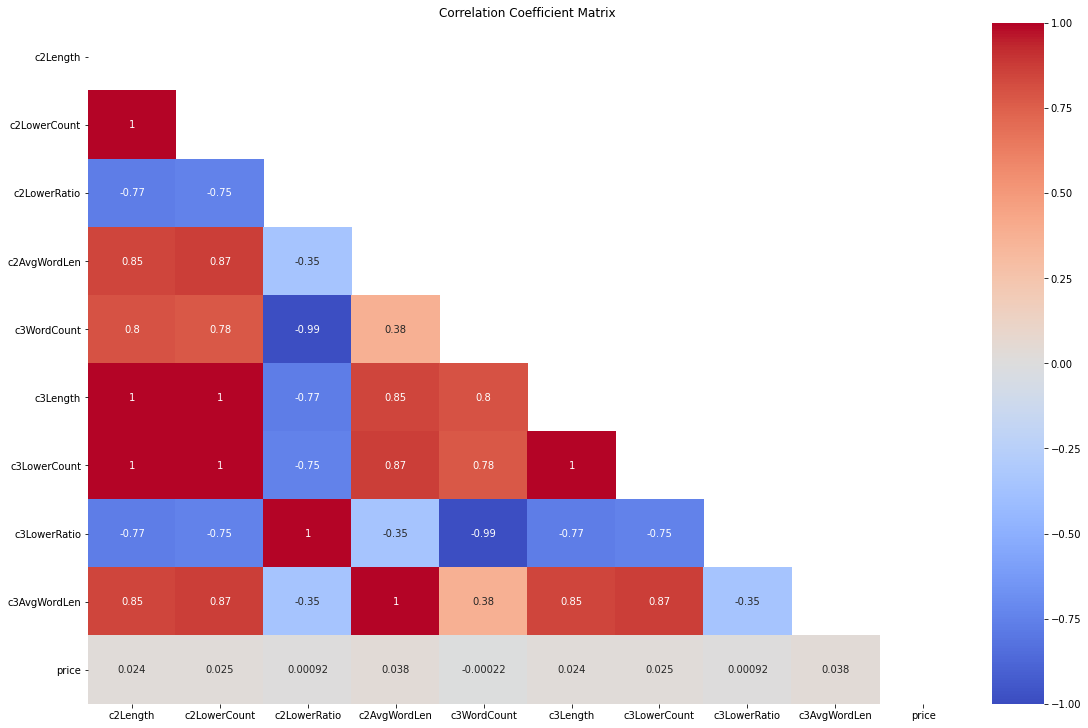

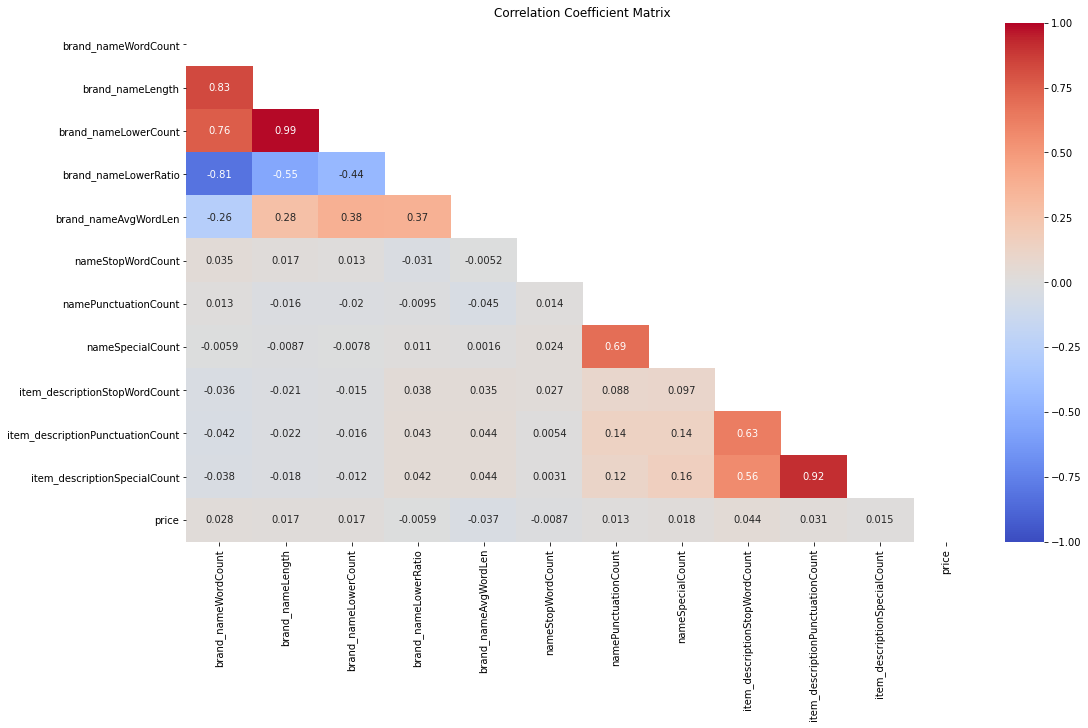

In [84]:
all_corrs, sorted_list = display_correlation_matrix(df)

In [99]:
all_corrs[0]

,item_condition_id,shipping,clean_nameWordCount,clean_nameLength,clean_nameLowerCount,clean_nameLowerRatio,clean_nameAvgWordLen,clean_descriptionWordCount,clean_descriptionLength,price
item_condition_id,1.000000,-0.191236,-0.120405,-0.143982,-0.147437,-0.002427,-0.034983,-0.121326,-0.130420,-0.000767
shipping,-0.191236,1.000000,0.077711,0.101896,0.099735,-0.020891,0.034930,0.102949,0.109915,-0.097279
clean_nameWordCount,-0.120405,0.077711,1.000000,0.873698,0.778383,-0.557938,-0.315166,0.217870,0.217364,0.029841
clean_nameLength,-0.143982,0.101896,0.873698,1.000000,0.979710,-0.252103,0.137026,0.233655,0.241127,0.025833
clean_nameLowerCount,-0.147437,0.099735,0.778383,0.979710,1.000000,-0.072301,0.272103,0.215976,0.225300,0.013757
clean_nameLowerRatio,-0.002427,-0.020891,-0.557938,-0.252103,-0.072301,1.000000,0.630216,-0.105914,-0.099282,-0.068026
clean_nameAvgWordLen,-0.034983,0.034930,-0.315166,0.137026,0.272103,0.630216,1.000000,0.005772,0.019020,-0.015147
clean_descriptionWordCount,-0.121326,0.102949,0.217870,0.233655,0.215976,-0.105914,0.005772,1.000000,0.993495,0.051087
clean_descriptionLength,-0.130420,0.109915,0.217364,0.241127,0.225300,-0.099282,0.019020,0.993495,1.000000,0.049382
price,-0.000767,-0.097279,0.029841,0.025833,0.013757,-0.068026,-0.015147,0.051087,0.049382,1.000000


In [100]:
all_corrs[1]

,clean_descriptionLowerCount,clean_descriptionLowerRatio,clean_descriptionAvgWordLen,c1WordCount,c1Length,c1LowerCount,c1LowerRatio,c1AvgWordLen,c2WordCount,price
clean_descriptionLowerCount,1.000000,-0.146097,0.065379,0.017542,0.075802,0.078570,-0.019272,0.106427,0.017542,0.047367
clean_descriptionLowerRatio,-0.146097,1.000000,0.548486,-0.002644,0.008625,0.009243,0.002148,0.016499,-0.002644,-0.051319
clean_descriptionAvgWordLen,0.065379,0.548486,1.000000,0.027494,0.051641,0.052511,-0.025781,0.056214,0.027494,-0.003180
c1WordCount,0.017542,-0.002644,0.027494,1.000000,0.802157,0.778264,-0.989497,0.375436,1.000000,-0.000219
c1Length,0.075802,0.008625,0.051641,0.802157,1.000000,0.999239,-0.771750,0.850164,0.802157,0.024202
c1LowerCount,0.078570,0.009243,0.052511,0.778264,0.999239,1.000000,-0.746973,0.869534,0.778264,0.025466
c1LowerRatio,-0.019272,0.002148,-0.025781,-0.989497,-0.771750,-0.746973,1.000000,-0.354002,-0.989497,0.000924
c1AvgWordLen,0.106427,0.016499,0.056214,0.375436,0.850164,0.869534,-0.354002,1.000000,0.375436,0.038120
c2WordCount,0.017542,-0.002644,0.027494,1.000000,0.802157,0.778264,-0.989497,0.375436,1.000000,-0.000219
price,0.047367,-0.051319,-0.003180,-0.000219,0.024202,0.025466,0.000924,0.038120,-0.000219,1.000000


In [101]:
all_corrs[2]

,c2Length,c2LowerCount,c2LowerRatio,c2AvgWordLen,c3WordCount,c3Length,c3LowerCount,c3LowerRatio,c3AvgWordLen,price
c2Length,1.000000,0.999239,-0.771750,0.850164,0.802157,1.000000,0.999239,-0.771750,0.850164,0.024202
c2LowerCount,0.999239,1.000000,-0.746973,0.869534,0.778264,0.999239,1.000000,-0.746973,0.869534,0.025466
c2LowerRatio,-0.771750,-0.746973,1.000000,-0.354002,-0.989497,-0.771750,-0.746973,1.000000,-0.354002,0.000924
c2AvgWordLen,0.850164,0.869534,-0.354002,1.000000,0.375436,0.850164,0.869534,-0.354002,1.000000,0.038120
c3WordCount,0.802157,0.778264,-0.989497,0.375436,1.000000,0.802157,0.778264,-0.989497,0.375436,-0.000219
c3Length,1.000000,0.999239,-0.771750,0.850164,0.802157,1.000000,0.999239,-0.771750,0.850164,0.024202
c3LowerCount,0.999239,1.000000,-0.746973,0.869534,0.778264,0.999239,1.000000,-0.746973,0.869534,0.025466
c3LowerRatio,-0.771750,-0.746973,1.000000,-0.354002,-0.989497,-0.771750,-0.746973,1.000000,-0.354002,0.000924
c3AvgWordLen,0.850164,0.869534,-0.354002,1.000000,0.375436,0.850164,0.869534,-0.354002,1.000000,0.038120
price,0.024202,0.025466,0.000924,0.038120,-0.000219,0.024202,0.025466,0.000924,0.038120,1.000000


In [102]:
all_corrs[3]

,brand_nameWordCount,brand_nameLength,brand_nameLowerCount,brand_nameLowerRatio,brand_nameAvgWordLen,nameStopWordCount,namePunctuationCount,nameSpecialCount,item_descriptionStopWordCount,item_descriptionPunctuationCount,item_descriptionSpecialCount,price
brand_nameWordCount,1.000000,0.832813,0.758067,-0.813817,-0.260251,0.034597,0.013130,-0.005917,-0.036304,-0.041525,-0.038184,0.027873
brand_nameLength,0.832813,1.000000,0.990328,-0.550574,0.275535,0.016816,-0.016023,-0.008672,-0.020590,-0.021698,-0.017831,0.017282
brand_nameLowerCount,0.758067,0.990328,1.000000,-0.439271,0.379321,0.013073,-0.019646,-0.007752,-0.015394,-0.015605,-0.011906,0.017075
brand_nameLowerRatio,-0.813817,-0.550574,-0.439271,1.000000,0.371887,-0.031141,-0.009542,0.010905,0.038009,0.042919,0.041783,-0.005876
brand_nameAvgWordLen,-0.260251,0.275535,0.379321,0.371887,1.000000,-0.005233,-0.045367,0.001551,0.034560,0.043788,0.044155,-0.037472
nameStopWordCount,0.034597,0.016816,0.013073,-0.031141,-0.005233,1.000000,0.013823,0.024083,0.027350,0.005385,0.003082,-0.008725
namePunctuationCount,0.013130,-0.016023,-0.019646,-0.009542,-0.045367,0.013823,1.000000,0.694403,0.087878,0.136610,0.116131,0.013270
nameSpecialCount,-0.005917,-0.008672,-0.007752,0.010905,0.001551,0.024083,0.694403,1.000000,0.096911,0.135275,0.158521,0.017515
item_descriptionStopWordCount,-0.036304,-0.020590,-0.015394,0.038009,0.034560,0.027350,0.087878,0.096911,1.000000,0.625646,0.564299,0.043725
item_descriptionPunctuationCount,-0.041525,-0.021698,-0.015605,0.042919,0.043788,0.005385,0.136610,0.135275,0.625646,1.000000,0.919280,0.030833


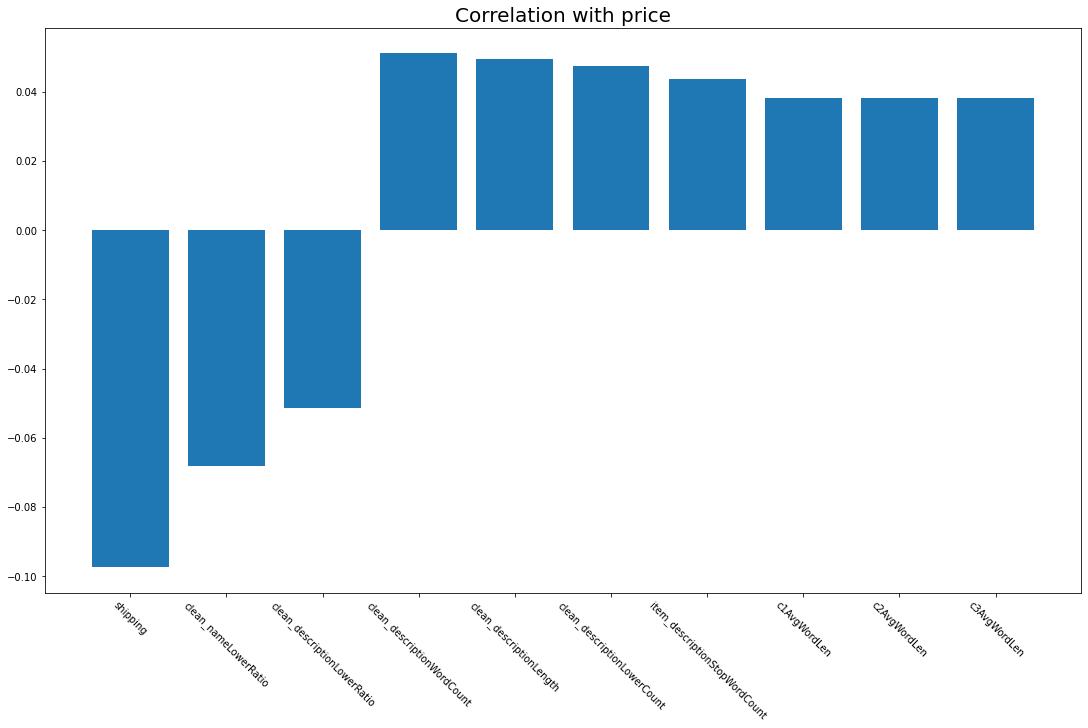

In [98]:
plot_sort_corr_coeff(sorted_list, num_to_display = 10)

## Pairplots

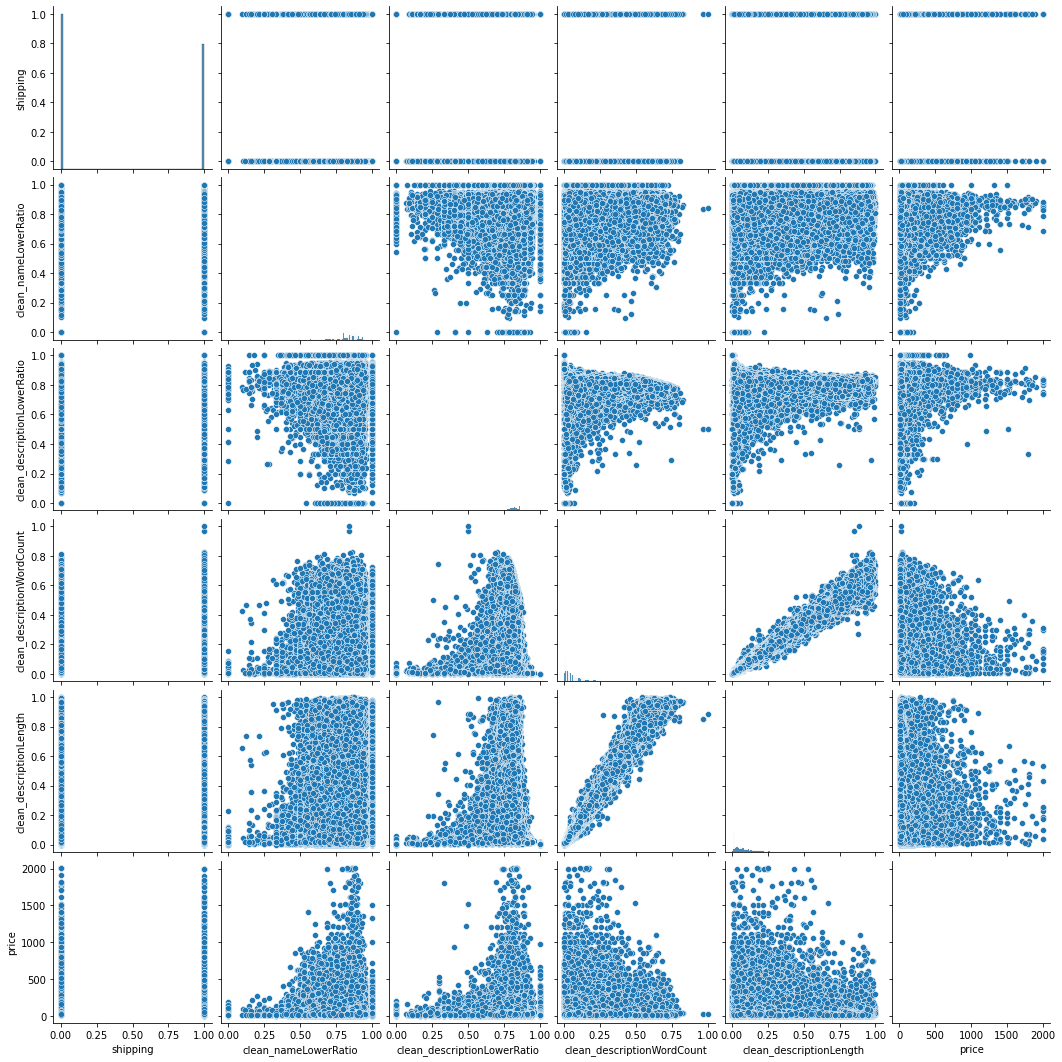

In [109]:
plot_pair_plot(df, columns = list(sorted_list[1][:5]) + ['price'])